In [2]:
# import required libraries and load data file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pathlib  
import ipywidgets as widgets
from IPython.display import display

# Load the data
df = pd.read_csv('data/combined.csv')

# How big is this dataset?
print(df.shape)
print('This work was done by Philip!')

C:\Users\Philip\AppData\Local\Temp\ipykernel_25172\1222123440.py:12: DtypeWarning: Columns (29,34,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/combined.csv')


(1588647, 51)
This work was done by Philip!


There are 1.5ish million rows and 51 columns.  Notice the error that columns 29, 34, 35 and 37 have mixed data types.  These are columns that I am going to delete, so this is not a concern.

# 1) Data description and cleaning

In [3]:
print(df.dtypes)

BEGIN_YEARMONTH         int64
BEGIN_DAY               int64
BEGIN_TIME              int64
END_YEARMONTH           int64
END_DAY                 int64
END_TIME                int64
EPISODE_ID              int64
EVENT_ID                int64
STATE                  object
STATE_FIPS            float64
YEAR                    int64
MONTH_NAME             object
EVENT_TYPE             object
CZ_TYPE                object
CZ_FIPS                 int64
CZ_NAME                object
WFO                    object
BEGIN_DATE_TIME        object
CZ_TIMEZONE            object
END_DATE_TIME          object
INJURIES_DIRECT         int64
INJURIES_INDIRECT       int64
DEATHS_DIRECT           int64
DEATHS_INDIRECT         int64
DAMAGE_PROPERTY        object
DAMAGE_CROPS           object
SOURCE                 object
MAGNITUDE             float64
MAGNITUDE_TYPE         object
FLOOD_CAUSE            object
CATEGORY              float64
TOR_F_SCALE            object
TOR_LENGTH            float64
TOR_WIDTH 

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1588647 entries, 0 to 1588646
Data columns (total 51 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   BEGIN_YEARMONTH     1588647 non-null  int64  
 1   BEGIN_DAY           1588647 non-null  int64  
 2   BEGIN_TIME          1588647 non-null  int64  
 3   END_YEARMONTH       1588647 non-null  int64  
 4   END_DAY             1588647 non-null  int64  
 5   END_TIME            1588647 non-null  int64  
 6   EPISODE_ID          1588647 non-null  int64  
 7   EVENT_ID            1588647 non-null  int64  
 8   STATE               1588646 non-null  object 
 9   STATE_FIPS          1588646 non-null  float64
 10  YEAR                1588647 non-null  int64  
 11  MONTH_NAME          1588647 non-null  object 
 12  EVENT_TYPE          1588647 non-null  object 
 13  CZ_TYPE             1588647 non-null  object 
 14  CZ_FIPS             1588647 non-null  int64  
 15  CZ_NAME        

In [5]:
print(df.isnull().sum())

BEGIN_YEARMONTH             0
BEGIN_DAY                   0
BEGIN_TIME                  0
END_YEARMONTH               0
END_DAY                     0
END_TIME                    0
EPISODE_ID                  0
EVENT_ID                    0
STATE                       1
STATE_FIPS                  1
YEAR                        0
MONTH_NAME                  0
EVENT_TYPE                  0
CZ_TYPE                     0
CZ_FIPS                     0
CZ_NAME                     0
WFO                         0
BEGIN_DATE_TIME             0
CZ_TIMEZONE                 0
END_DATE_TIME               0
INJURIES_DIRECT             0
INJURIES_INDIRECT           0
DEATHS_DIRECT               0
DEATHS_INDIRECT             0
DAMAGE_PROPERTY        523675
DAMAGE_CROPS           618055
SOURCE                  23114
MAGNITUDE              760023
MAGNITUDE_TYPE        1086193
FLOOD_CAUSE           1473785
CATEGORY              1588163
TOR_F_SCALE           1550655
TOR_LENGTH            1550655
TOR_WIDTH 

many of these columns are not going to be of any value to us here.  We will eliminate the unwanted columns first.  Many of the unwanted columns also have nulls.  We solve two problems by this elimination.

In [6]:
# Drop columns: 'EVENT_NARRATIVE', 'DATA_SOURCE' and 31 other columns
df = df.drop(columns=['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH', 'END_DAY', 'END_TIME', 'EVENT_NARRATIVE', 'DATA_SOURCE', 'EPISODE_NARRATIVE', 'END_LON', 'END_LAT', 'BEGIN_LON', 'BEGIN_LAT', 'END_LOCATION', 'END_AZIMUTH', 'END_RANGE', 'BEGIN_LOCATION', 'BEGIN_AZIMUTH', 'BEGIN_RANGE', 'TOR_OTHER_CZ_NAME', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_STATE', 'TOR_OTHER_WFO', 'TOR_WIDTH', 'TOR_LENGTH', 'CATEGORY', 'FLOOD_CAUSE', 'MAGNITUDE_TYPE', 'MAGNITUDE', 'SOURCE', 'DAMAGE_CROPS', 'DAMAGE_PROPERTY', 'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME', 'CZ_FIPS', 'CZ_TYPE'])

In [7]:
print(df.shape)

(1588647, 13)


In [8]:
print(df.isnull().sum())

EPISODE_ID                 0
EVENT_ID                   0
STATE                      1
STATE_FIPS                 1
YEAR                       0
MONTH_NAME                 0
EVENT_TYPE                 0
CZ_NAME                    0
INJURIES_DIRECT            0
INJURIES_INDIRECT          0
DEATHS_DIRECT              0
DEATHS_INDIRECT            0
TOR_F_SCALE          1550655
dtype: int64


A much more manageable dataset.  Only two columns have a null.  Probably the same row.  Let's look.

In [9]:
null_rows = df[df.isnull().any(axis=1)]
print(null_rows)

         EPISODE_ID  EVENT_ID       STATE  STATE_FIPS  YEAR MONTH_NAME  \
0           2150762   5670481        OHIO        39.0  1998   November   
1           2151390   5673776  NEW JERSEY        34.0  1998   December   
2           2151636   5673835    VIRGINIA        51.0  1998   December   
3           2149688   5667315  NEW MEXICO        35.0  1998    October   
4           2149120   5664635     GEORGIA        13.0  1998  September   
...             ...       ...         ...         ...   ...        ...   
1588642      189323   1164353   WISCONSIN        55.0  2024      April   
1588643      189323   1164365   WISCONSIN        55.0  2024      April   
1588644      189361   1164589    NEBRASKA        31.0  2024      April   
1588645      190540   1172950    ILLINOIS        17.0  2024      April   
1588646      190543   1171462    MISSOURI        29.0  2024      April   

                EVENT_TYPE         CZ_NAME  INJURIES_DIRECT  \
0        Thunderstorm Wind        DELAWARE      

So Guam isn't really a state.  Are there other instances for Guam?  Not sure if we want to include Guam just yet.  I am leaning towards restricting the exploration to just the contiguous 48 states.

In [10]:
# Assuming df is your DataFrame and you are searching in a column named 'column_name'
guam_rows = df[df['STATE'].str.contains('Guam', na=False)]
print(guam_rows)

Empty DataFrame
Columns: [EPISODE_ID, EVENT_ID, STATE, STATE_FIPS, YEAR, MONTH_NAME, EVENT_TYPE, CZ_NAME, INJURIES_DIRECT, INJURIES_INDIRECT, DEATHS_DIRECT, DEATHS_INDIRECT, TOR_F_SCALE]
Index: []


Apparently Guam doesn't have any other data in this dataset.   

In [11]:
df['STATE'] = df['STATE'].fillna('Guam')
null_rows = df[df.isnull().any(axis=1)]
print(null_rows)

         EPISODE_ID  EVENT_ID       STATE  STATE_FIPS  YEAR MONTH_NAME  \
0           2150762   5670481        OHIO        39.0  1998   November   
1           2151390   5673776  NEW JERSEY        34.0  1998   December   
2           2151636   5673835    VIRGINIA        51.0  1998   December   
3           2149688   5667315  NEW MEXICO        35.0  1998    October   
4           2149120   5664635     GEORGIA        13.0  1998  September   
...             ...       ...         ...         ...   ...        ...   
1588642      189323   1164353   WISCONSIN        55.0  2024      April   
1588643      189323   1164365   WISCONSIN        55.0  2024      April   
1588644      189361   1164589    NEBRASKA        31.0  2024      April   
1588645      190540   1172950    ILLINOIS        17.0  2024      April   
1588646      190543   1171462    MISSOURI        29.0  2024      April   

                EVENT_TYPE         CZ_NAME  INJURIES_DIRECT  \
0        Thunderstorm Wind        DELAWARE      

I think that this dataset is almost ready.  There is one more column to eliminate CZ_Name.    
There are several different types of time here.  Not sure that they are all useful, keeping them for now.
I also want to combine the injuries and death columns into a single deaths and injuries column.  Decided abainst removing the column State FIps as I will experiment with making maps at the end.  Fips is a commmon state code.

In [12]:
df = df.drop(columns=['CZ_NAME'])
df['total_injuries_deaths'] = df[['INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT']].sum(axis=1)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1588647 entries, 0 to 1588646
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   EPISODE_ID             1588647 non-null  int64  
 1   EVENT_ID               1588647 non-null  int64  
 2   STATE                  1588647 non-null  object 
 3   STATE_FIPS             1588646 non-null  float64
 4   YEAR                   1588647 non-null  int64  
 5   MONTH_NAME             1588647 non-null  object 
 6   EVENT_TYPE             1588647 non-null  object 
 7   INJURIES_DIRECT        1588647 non-null  int64  
 8   INJURIES_INDIRECT      1588647 non-null  int64  
 9   DEATHS_DIRECT          1588647 non-null  int64  
 10  DEATHS_INDIRECT        1588647 non-null  int64  
 11  TOR_F_SCALE            37992 non-null    object 
 12  total_injuries_deaths  1588647 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 157.6+ MB
None


Ok, things are looking much better.  Time to explore whate states we have.

In [13]:
unique_states = df['STATE'].unique()
sorted_unique_states = sorted(unique_states)
print(sorted_unique_states)

['ALABAMA', 'ALASKA', 'AMERICAN SAMOA', 'ARIZONA', 'ARKANSAS', 'ATLANTIC NORTH', 'ATLANTIC SOUTH', 'CALIFORNIA', 'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA', 'E PACIFIC', 'FLORIDA', 'GEORGIA', 'GUAM', 'GUAM WATERS', 'GULF OF ALASKA', 'GULF OF MEXICO', 'Guam', 'HAWAII', 'HAWAII WATERS', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LAKE ERIE', 'LAKE HURON', 'LAKE MICHIGAN', 'LAKE ONTARIO', 'LAKE ST CLAIR', 'LAKE SUPERIOR', 'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'PUERTO RICO', 'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'ST LAWRENCE R', 'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGIN ISLANDS', 'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA', 'WISCONSIN', 'WYOMING']


Ok, so let's keep this simple and focus just on the 48 contiguous US states.  We'll remove all of the other places from the states column.

In [14]:
states_to_remove = [
    'AMERICAN SAMOA', 'ALASKA', 'ATLANTIC NORTH', 'ATLANTIC SOUTH', 'E PACIFIC', 'GUAM', 'Guam', 
    'GUAM WATERS', 'GULF OF ALASKA', 'GULF OF MEXICO', 'HAWAII', 'HAWAII WATERS', 
    'LAKE ERIE', 'LAKE HURON', 'LAKE MICHIGAN', 'LAKE ONTARIO', 'LAKE SUPERIOR', 
    'LAKE ST CLAIR', 'PUERTO RICO', 'ST LAWRENCE R', 'ST. LAWRENCE RIVER', 'VIRGIN ISLANDS',
]

df = df[~df['STATE'].isin(states_to_remove)]

That should have removed all everything that we don't want.  Let's make sure by counting the states.

In [15]:
unique_states = df['STATE'].unique()
sorted_unique_states = sorted(unique_states)
print(sorted_unique_states)

unique_state_count = df['STATE'].nunique()
print(unique_state_count)

['ALABAMA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA', 'WISCONSIN', 'WYOMING']
49


So there we go.  We have the 48 contiguous states and the district of columbia.  That looks good.  Now lets look at the event types.  This is the entire storm database; however, our focus is just Thunderstorms and related phenomena.  So there are a lot of event types that need to be excluded.  

In [16]:
unique_event_types = df['EVENT_TYPE'].unique()
print(unique_event_types)

['Thunderstorm Wind' 'Drought' 'Ice Storm' 'Hail' 'Winter Weather' 'Heat'
 'Heavy Snow' 'Winter Storm' 'Flash Flood' 'Flood' 'Tropical Storm'
 'Lightning' 'High Wind' 'Heavy Rain' 'Strong Wind' 'Tornado'
 'Cold/Wind Chill' 'Hurricane (Typhoon)' 'Lake-Effect Snow' 'Sleet'
 'Dense Fog' 'Funnel Cloud' 'Blizzard' 'Wildfire' 'Avalanche' 'Waterspout'
 'High Surf' 'Storm Surge/Tide' 'Rip Current' 'Seiche' 'Coastal Flood'
 'Dust Storm' 'Frost/Freeze' 'Dust Devil' 'Debris Flow' 'Freezing Fog'
 'Marine High Wind' 'Extreme Cold/Wind Chill' 'Excessive Heat'
 'Northern Lights' 'Volcanic Ash' 'Dense Smoke' 'Tsunami'
 'Lakeshore Flood' 'Astronomical Low Tide' 'Tropical Depression'
 'Sneakerwave' 'Hurricane']


As we thought.  A lot of event types that are unwanted.  We only want to keep Thunderstorm wind, hail, lightning, high wind, strong wind, and tornado.  Not sure why there are three different types of wind.  IS this an idiosyncracy in the data?  Did different reporting eras use different terms?  OR, are there distinct differences?  The metadata I have found thus far is not clear on this matter.  I will search for better metadata.  For now, the three types of wind will all remain.

In [17]:
event_types_to_keep = ['Thunderstorm Wind', 'Hail', 'Lightning', 'High Wind', 'Strong Wind', 'Tornado']

df = df[df['EVENT_TYPE'].isin(event_types_to_keep)]

unique_event_types = df['EVENT_TYPE'].unique()
print(unique_event_types)

['Thunderstorm Wind' 'Hail' 'Lightning' 'High Wind' 'Strong Wind'
 'Tornado']


Now we have the lower 48 states and DC, no nulls, and Thunderstorm related events.  We still need to sort out the different types of wind!  I think that we are ready to do some EDA.

# 2) Start the EDA

In [18]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 865841 entries, 0 to 1588646
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   EPISODE_ID             865841 non-null  int64  
 1   EVENT_ID               865841 non-null  int64  
 2   STATE                  865841 non-null  object 
 3   STATE_FIPS             865841 non-null  float64
 4   YEAR                   865841 non-null  int64  
 5   MONTH_NAME             865841 non-null  object 
 6   EVENT_TYPE             865841 non-null  object 
 7   INJURIES_DIRECT        865841 non-null  int64  
 8   INJURIES_INDIRECT      865841 non-null  int64  
 9   DEATHS_DIRECT          865841 non-null  int64  
 10  DEATHS_INDIRECT        865841 non-null  int64  
 11  TOR_F_SCALE            37949 non-null   object 
 12  total_injuries_deaths  865841 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 92.5+ MB
None


We are down to 865841 rows.  That is almost half of our original database.  Or, to put it another way, slightly more than half of our rows were thunderstorm related.

In [19]:
print(df.describe())

         EPISODE_ID      EVENT_ID     STATE_FIPS           YEAR  \
count  8.658410e+05  8.658410e+05  865841.000000  865841.000000   
mean   4.915259e+05  2.110182e+06      30.627522    2011.051014   
std    6.272493e+05  2.266323e+06      14.568469       7.599938   
min    2.000000e+00  5.000000e+00       1.000000    1998.000000   
25%    6.731800e+04  4.054080e+05      20.000000    2005.000000   
50%    1.425690e+05  8.568860e+05      30.000000    2011.000000   
75%    1.121387e+06  5.270517e+06      42.000000    2018.000000   
max    2.414827e+06  5.724920e+06      56.000000    2024.000000   

       INJURIES_DIRECT  INJURIES_INDIRECT  DEATHS_DIRECT  DEATHS_INDIRECT  \
count    865841.000000      865841.000000  865841.000000    865841.000000   
mean          0.046545           0.001855       0.004792         0.000447   
std           2.223859           0.341596       0.226336         0.029330   
min           0.000000           0.000000       0.000000         0.000000   
25%        

OK, so df.describe() is a common way to examine data.  The statistics for each column though are not that useful to us yet.  

In [20]:
print(df.isnull().sum())

EPISODE_ID                    0
EVENT_ID                      0
STATE                         0
STATE_FIPS                    0
YEAR                          0
MONTH_NAME                    0
EVENT_TYPE                    0
INJURIES_DIRECT               0
INJURIES_INDIRECT             0
DEATHS_DIRECT                 0
DEATHS_INDIRECT               0
TOR_F_SCALE              827892
total_injuries_deaths         0
dtype: int64


The Tornado F-Scale has a lot of null values.  It makes sense though that the F-scale is only used when event_type=tornado

In [21]:
# How many null values does TOR_F_SCALE have for event type Tornado?
tornado_rows = df[df['EVENT_TYPE'] == 'Tornado']
print(tornado_rows['TOR_F_SCALE'].isnull().sum())

0


We were right.  There are no null Tor F scale values when event type is tornado.

In [22]:
# How many of each event type by state?
event_type_by_state = df.groupby(['EVENT_TYPE', 'STATE']).size().reset_index(name='count')
print(event_type_by_state)

    EVENT_TYPE          STATE  count
0         Hail        ALABAMA   5894
1         Hail        ARIZONA    927
2         Hail       ARKANSAS   8130
3         Hail     CALIFORNIA    757
4         Hail       COLORADO  11381
..         ...            ...    ...
289    Tornado       VIRGINIA    571
290    Tornado     WASHINGTON     65
291    Tornado  WEST VIRGINIA     95
292    Tornado      WISCONSIN    782
293    Tornado        WYOMING    271

[294 rows x 3 columns]


In [23]:
# Filter for tornado events
tornado_df = df[df['EVENT_TYPE'] == 'Tornado']

# Group by state and count the number of tornadoes
tornado_counts = tornado_df.groupby('STATE').size().reset_index(name='count')

# Sort the results to find the states with the most tornadoes
sorted_tornado_counts = tornado_counts.sort_values(by='count', ascending=False)

# Print the states with the most tornadoes
print("States with the most tornadoes:")
print(sorted_tornado_counts.head())

# Print the states with the least tornadoes
print("\nStates with the least tornadoes:")
print(sorted_tornado_counts.tail())

States with the most tornadoes:
          STATE  count
41        TEXAS   3625
14       KANSAS   2448
34     OKLAHOMA   2156
0       ALABAMA   1956
22  MISSISSIPPI   1950

States with the least tornadoes:
                   STATE  count
27         NEW HAMPSHIRE     34
6               DELAWARE     22
43               VERMONT     18
37          RHODE ISLAND     12
7   DISTRICT OF COLUMBIA      5


So Texas had the most Tornados.  IS that because Texas is just really big in terms of area?  Tornados per area is a calculation we should endeavor to do.  That would require more data.  Fortunately, the plan is to load spatial data soon.

In [24]:
# Assuming df is your DataFrame
# Filter for thunderstorm wind events
thunderstorm_wind_df = df[df['EVENT_TYPE'] == 'Thunderstorm Wind']

# Group by state and count the number of thunderstorm wind events
thunderstorm_wind_counts = thunderstorm_wind_df.groupby('STATE').size().reset_index(name='count')

# Sort the results to find the states with the most thunderstorm wind events
sorted_thunderstorm_wind_counts = thunderstorm_wind_counts.sort_values(by='count', ascending=False)

# Print the states with the most thunderstorm wind events
print("States with the most thunderstorm wind events:")
print(sorted_thunderstorm_wind_counts.head())

# Print the states with the least thunderstorm wind events
print("\nStates with the least thunderstorm wind events:")
print(sorted_thunderstorm_wind_counts.tail())

States with the most thunderstorm wind events:
           STATE  count
41         TEXAS  22588
14        KANSAS  18200
9        GEORGIA  17317
36  PENNSYLVANIA  16625
44      VIRGINIA  16118

States with the least thunderstorm wind events:
                   STATE  count
26                NEVADA    746
45            WASHINGTON    473
35                OREGON    398
7   DISTRICT OF COLUMBIA    266
37          RHODE ISLAND    260


Texas again, with Thunderstorm winds.  IS this because Texas is so big?  Seems like a big question to be answered when spatial data is added.  The area part of this makes a lot of sense, DC and Rhode Island are both really small states.  Ranking the states this way is ranking by size and missing the subtleties of thunderstorms.  Let's save this question for part 3 where we will examine spatial questions.  Let's see how the variables relate to one another.

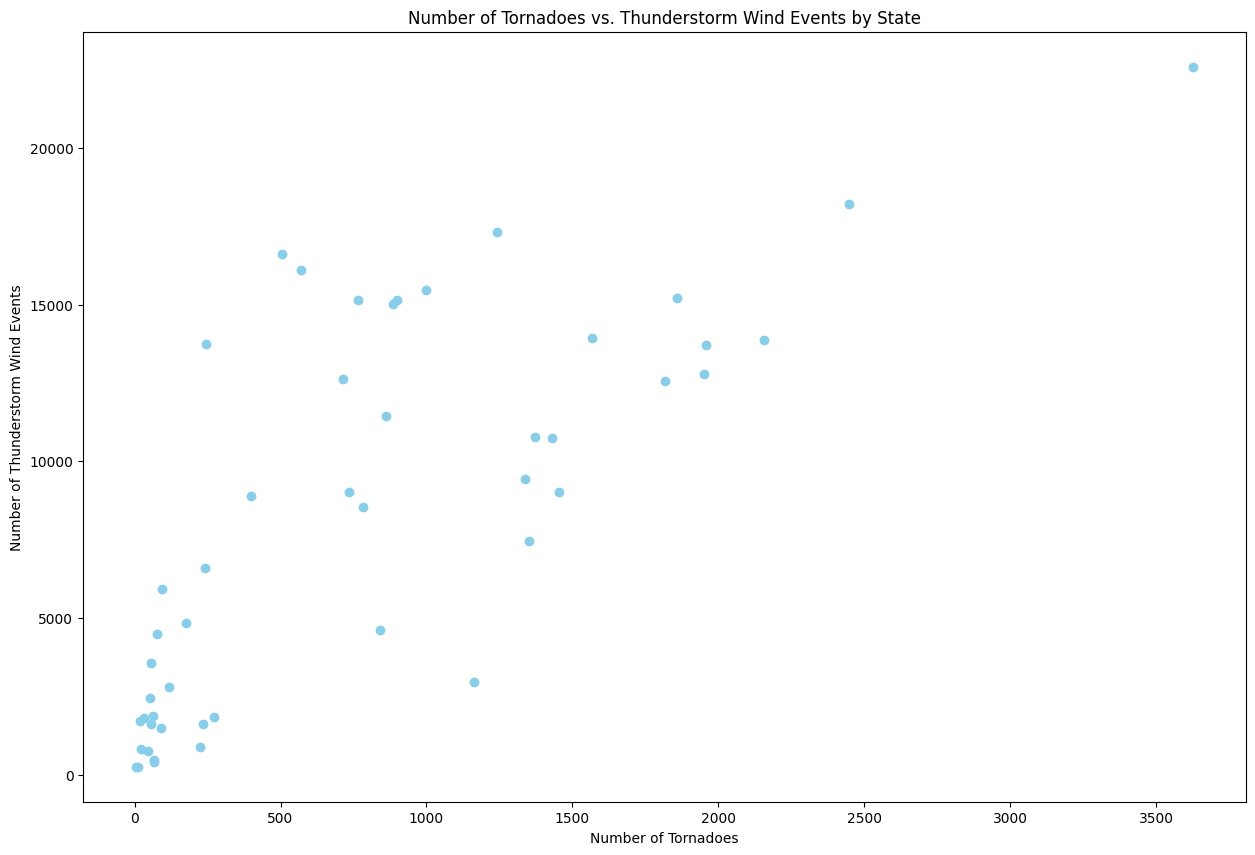

In [25]:
# Assuming df is your DataFrame
# Filter for tornado events
tornado_df = df[df['EVENT_TYPE'] == 'Tornado']

# Filter for thunderstorm wind events
thunderstorm_wind_df = df[df['EVENT_TYPE'] == 'Thunderstorm Wind']

# Check if the filtered DataFrames are empty
if tornado_df.empty:
    print("No tornado events found in the DataFrame.")
if thunderstorm_wind_df.empty:
    print("No thunderstorm wind events found in the DataFrame.")

# Group by state and count the number of tornadoes
tornado_counts_by_state = tornado_df.groupby('STATE').size().reset_index(name='tornado_count')

# Group by state and count the number of thunderstorm wind events
thunderstorm_wind_counts_by_state = thunderstorm_wind_df.groupby('STATE').size().reset_index(name='thunderstorm_wind_count')

# Merge the two DataFrames on the state column
merged_counts = pd.merge(tornado_counts_by_state, thunderstorm_wind_counts_by_state, on='STATE', how='inner')

# Check if the merged DataFrame is empty
if merged_counts.empty:
    print("No common states found between tornado and thunderstorm wind events.")

# Plot the scatter plot
plt.figure(figsize=(15, 10))
plt.scatter(merged_counts['tornado_count'], merged_counts['thunderstorm_wind_count'], color='skyblue')
plt.xlabel('Number of Tornadoes')
plt.ylabel('Number of Thunderstorm Wind Events')
plt.title('Number of Tornadoes vs. Thunderstorm Wind Events by State')
plt.show()

Visually, there seems to be a positive relationship between tornados and thunderstorms.  That has to be Texas in the top right corner.  Let us look at all of the variables in a pair plot.

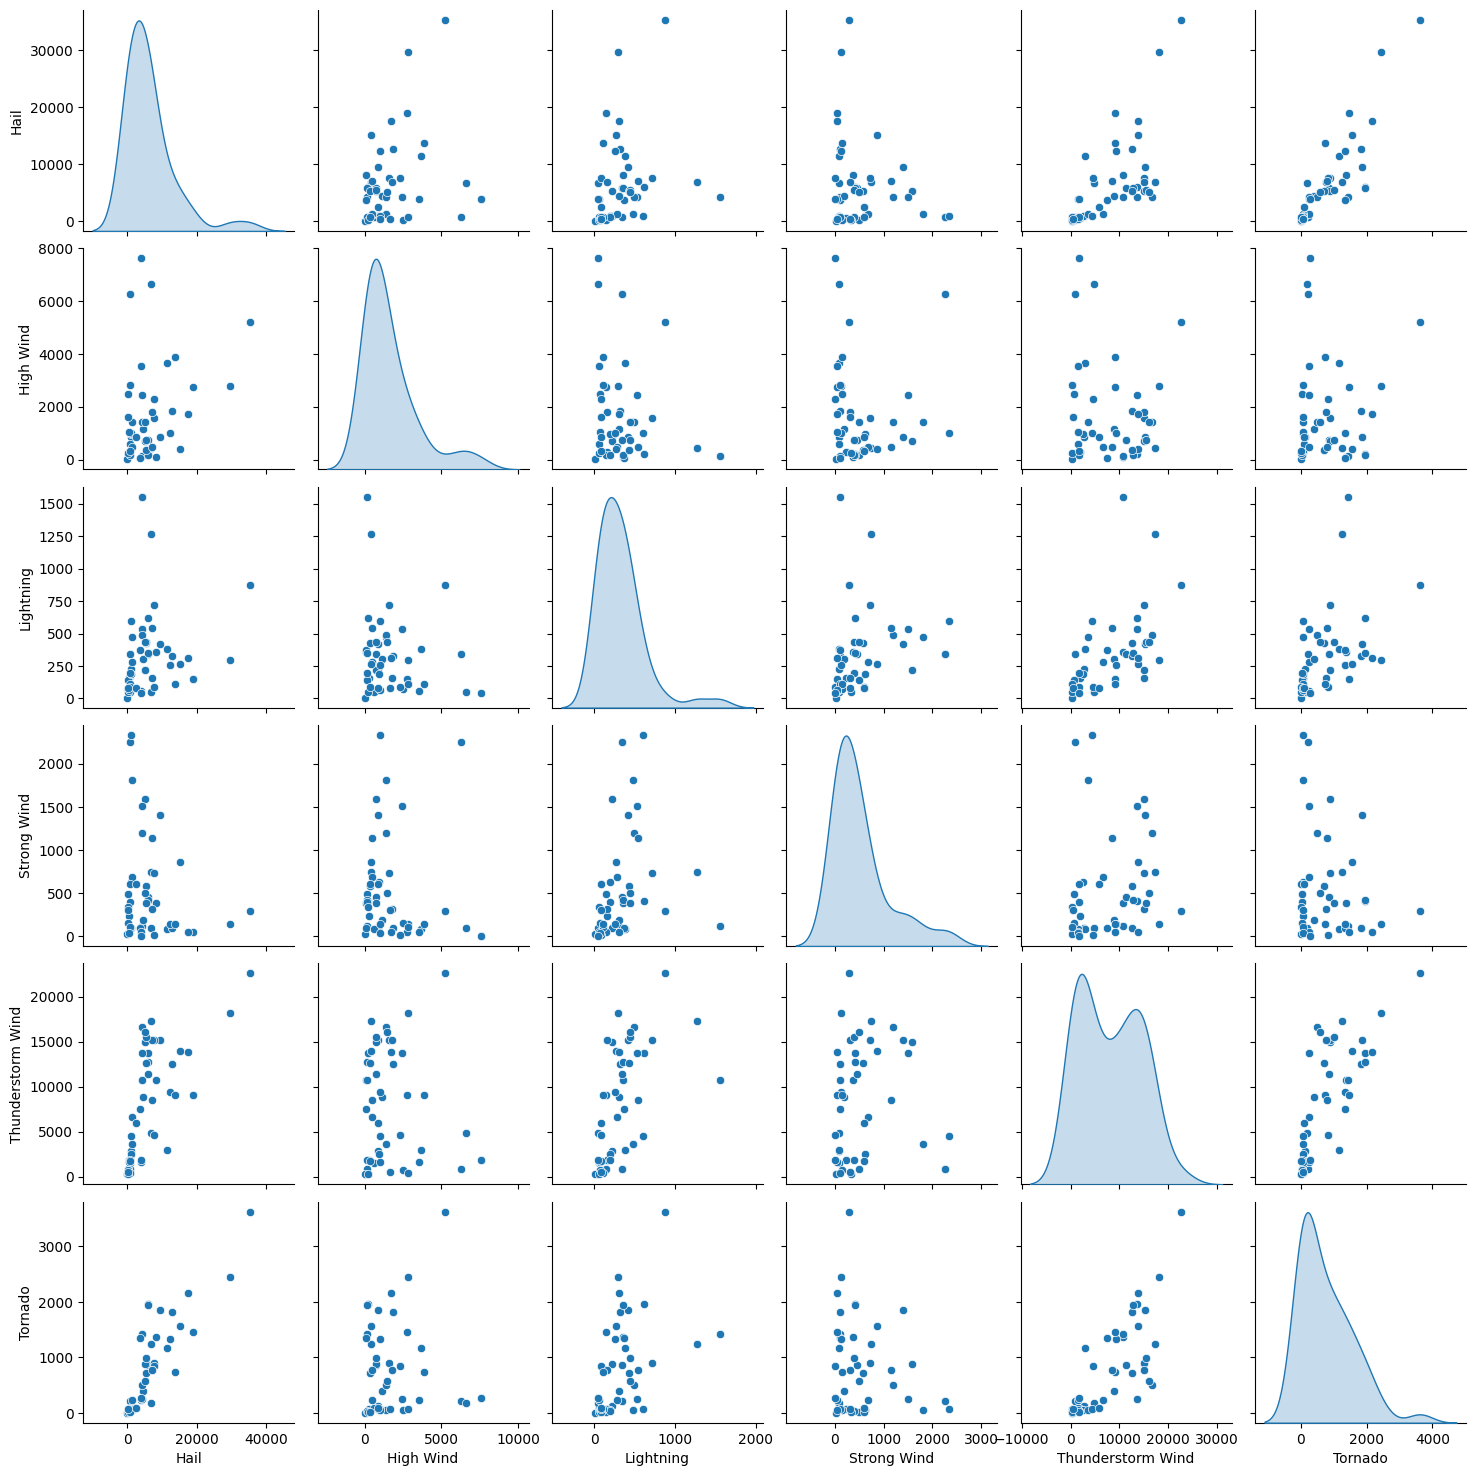

In [26]:
# Pivot the DataFrame to create a matrix of event counts by state
event_counts_by_state = df.pivot_table(index='STATE', columns='EVENT_TYPE', aggfunc='size', fill_value=0)

# Reset the index to convert the pivot table into a DataFrame
event_counts_by_state.reset_index(inplace=True)

# Create the pairplot
sns.pairplot(event_counts_by_state, diag_kind='kde')

# Show the plot
plt.show()

Visually we can see that some of these variables correlate with one another.  Certainly Hail and Tornado correlate.  Tornado and Thunderstorm Wind do too.  We would expect this as meterologists tell us that tornados, thunderstorms, hail and lightning are contemporaneous.  Strong wind and high wind don't correlate nearly as well.

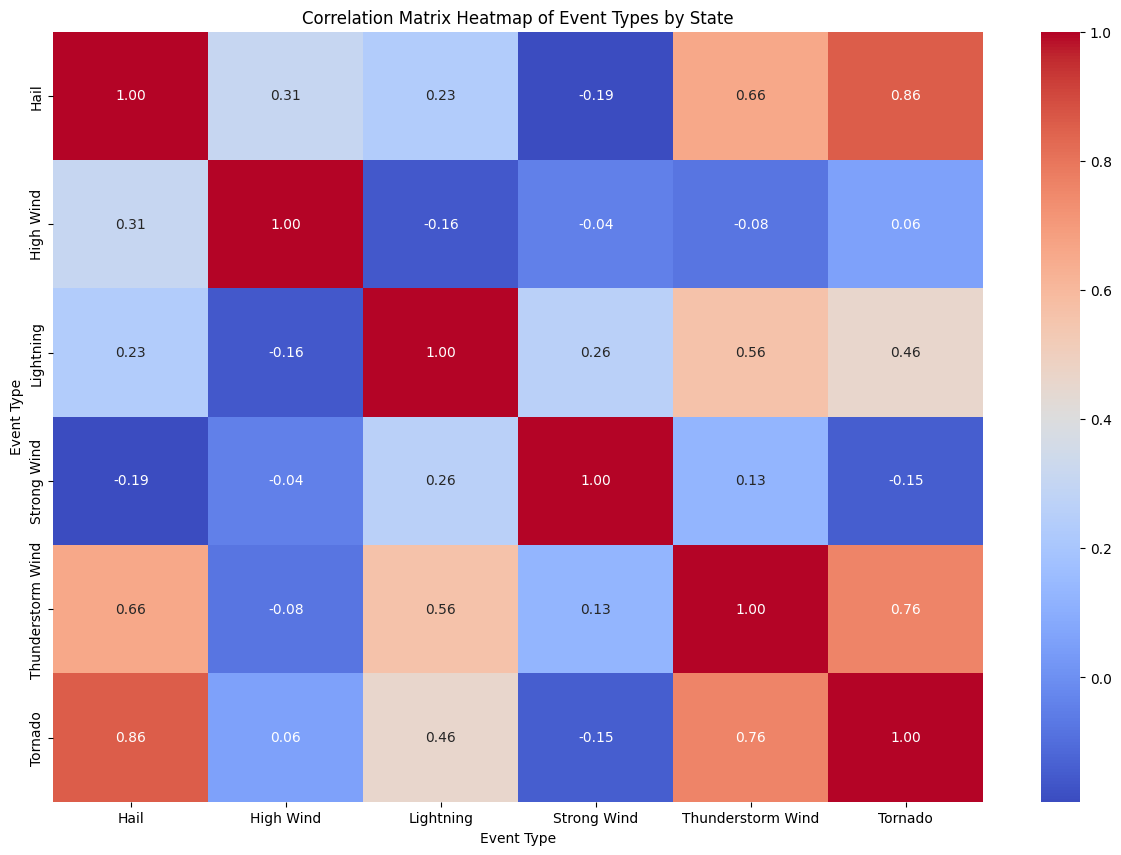

In [27]:
# Assuming df is your DataFrame
# Pivot the DataFrame to create a matrix of event counts by state
event_counts_by_state = df.pivot_table(index='STATE', columns='EVENT_TYPE', aggfunc='size', fill_value=0)

# Compute the correlation matrix
correlation_matrix = event_counts_by_state.corr()

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f')

# Add title and labels
plt.title('Correlation Matrix Heatmap of Event Types by State')
plt.xlabel('Event Type')
plt.ylabel('Event Type')

# Show the plot
plt.show()

Tornados are associated with Thunderstorms and lightning.  High winds and strong winds can result from other types of storms besides thunderstorms.  Thus, it does make sense that the correlation is quite low for strong winds.  Note: the first set of metadata for this dataset did not provide very good descriptions of the distinction between the different types of wind.  It was only later that I found a much more detailed set of metadata that explained the differences between the wind types.  Had I known earlier, I would have excluded high wind and strong wind as they are not related to thunderstorms.  Let's exclude them now.

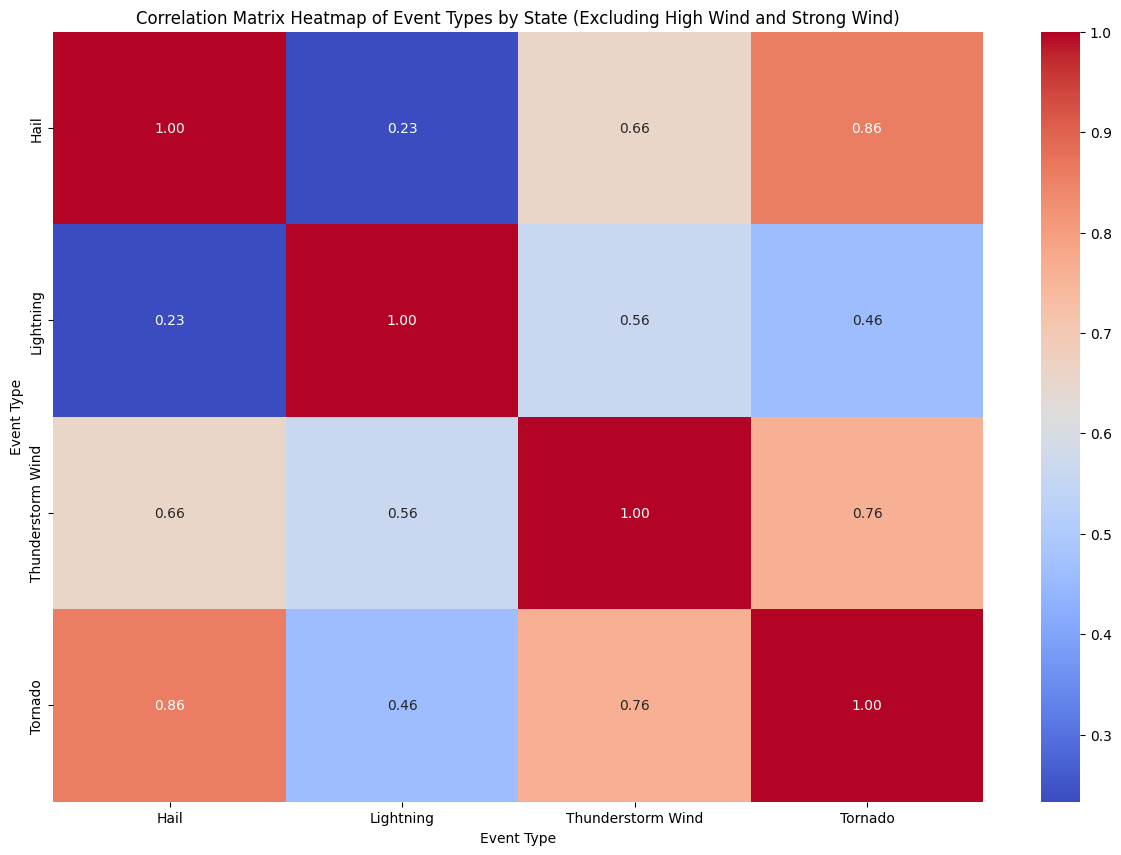

In [28]:
# Filter out "High Wind" and "Strong Wind" events
filtered_df = df[~df['EVENT_TYPE'].isin(['High Wind', 'Strong Wind'])]

# Pivot the DataFrame to create a matrix of event counts by state
event_counts_by_state = filtered_df.pivot_table(index='STATE', columns='EVENT_TYPE', aggfunc='size', fill_value=0)

# Compute the correlation matrix
correlation_matrix = event_counts_by_state.corr()

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f')

# Add title and labels
plt.title('Correlation Matrix Heatmap of Event Types by State (Excluding High Wind and Strong Wind)')
plt.xlabel('Event Type')
plt.ylabel('Event Type')

# Show the plot
plt.show()


Same as the previous heatmap.  But now we can see the event types that are of interest to us, namely those related to thunderstorms.  Time to look at other pieces of information.  We have information on what events are related.  Let's look at the time component.  When do these events occur?

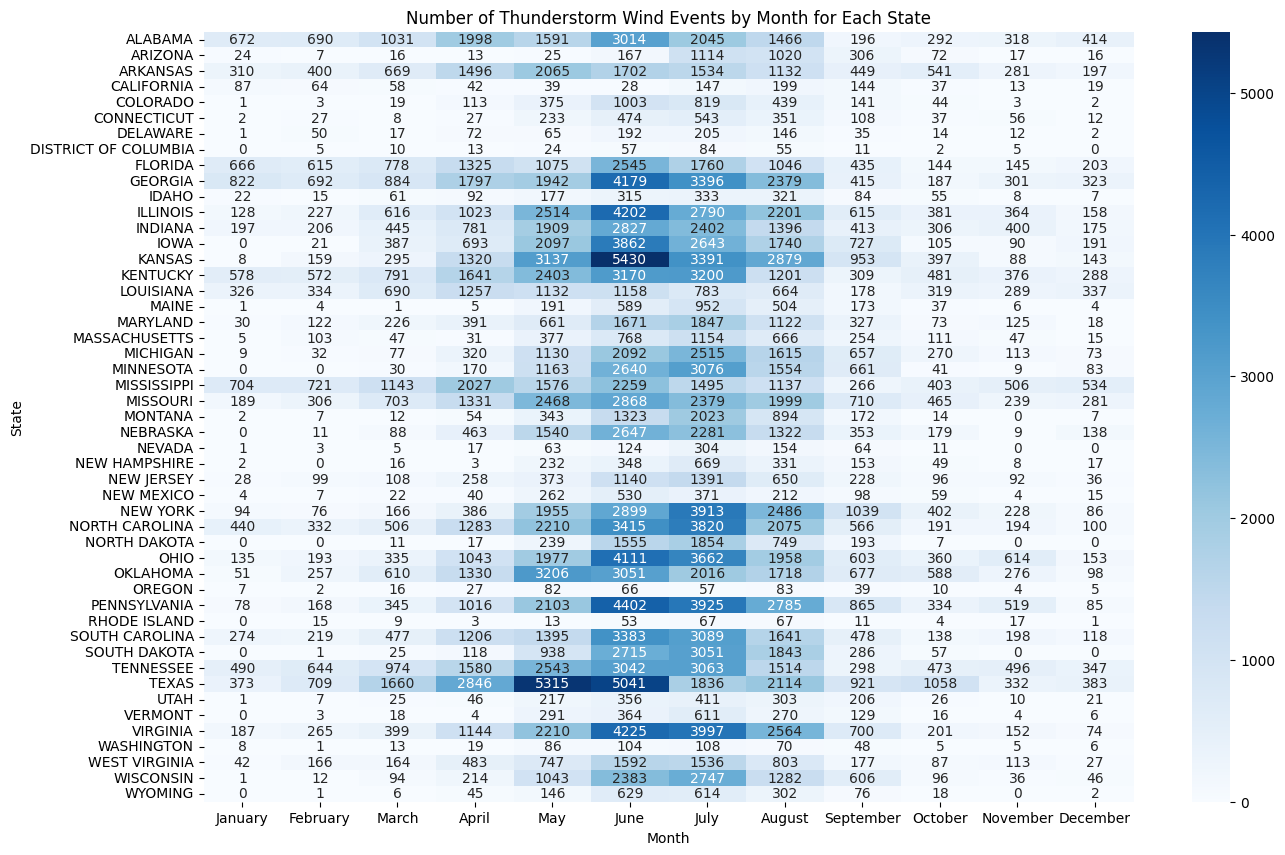

In [29]:

# Assuming df is your DataFrame
# Filter for thunderstorm wind events
thunderstorm_wind_df = df[df['EVENT_TYPE'] == 'Thunderstorm Wind']

# Group by state and month name and count the number of thunderstorm wind events
thunderstorm_wind_counts_by_state_month = thunderstorm_wind_df.groupby(['STATE', 'MONTH_NAME']).size().reset_index(name='count')

# Pivot the data to have states as rows and month names as columns
pivot_table = thunderstorm_wind_counts_by_state_month.pivot(index='STATE', columns='MONTH_NAME', values='count').fillna(0)

# Reorder the columns to ensure the months are in the correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
pivot_table = pivot_table[month_order]

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='g')

# Add title and labels
plt.title('Number of Thunderstorm Wind Events by Month for Each State')
plt.xlabel('Month')
plt.ylabel('State')

# Show the plot
plt.show()

Most Thunderstorms appear to occur in the months of May-August.  There are a lot less during the winter months.  What about Tornados?

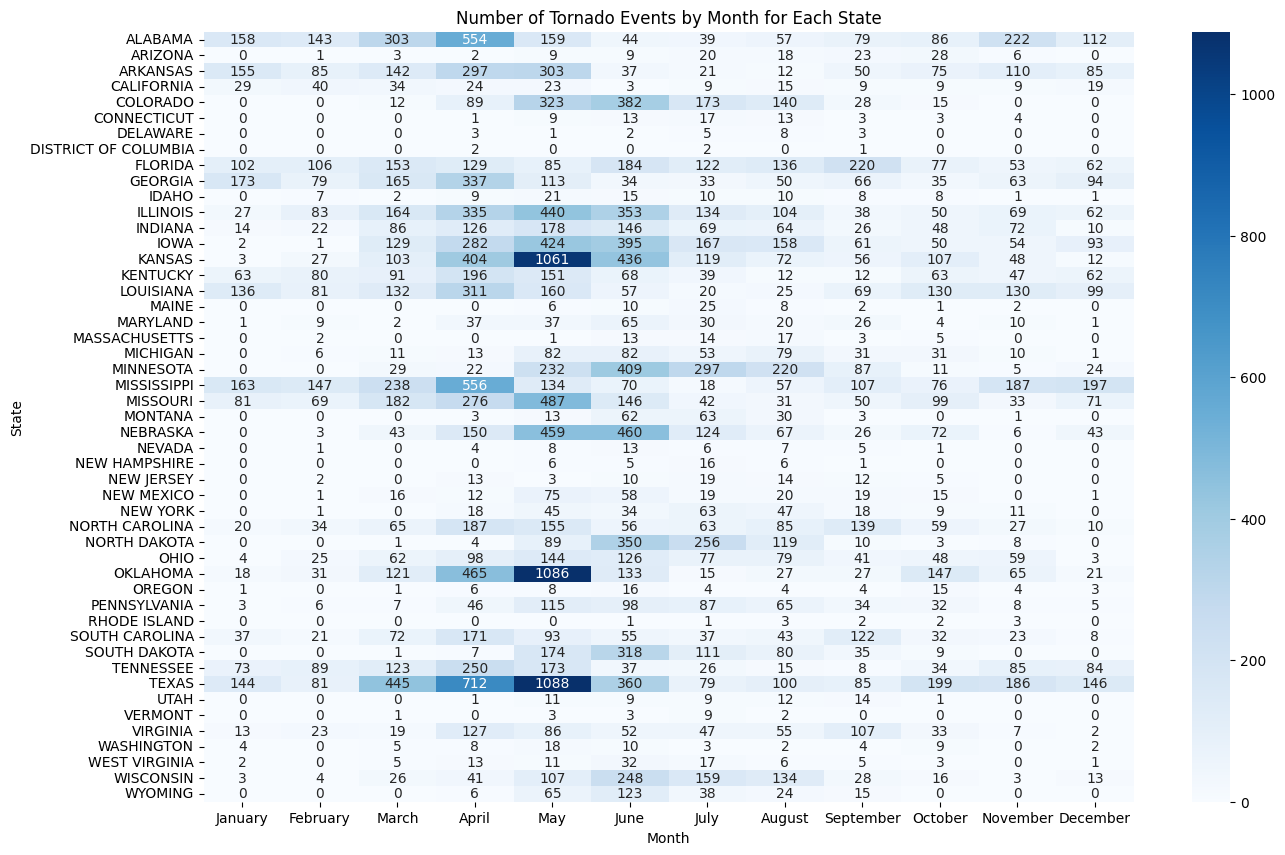

In [30]:
# Filter for tornado events
tornado_df = df[df['EVENT_TYPE'] == 'Tornado']

# Group by state and month name and count the number of tornado events
tornado_counts_by_state_month = tornado_df.groupby(['STATE', 'MONTH_NAME']).size().reset_index(name='count')

# Pivot the data to have states as rows and month names as columns
pivot_table = tornado_counts_by_state_month.pivot(index='STATE', columns='MONTH_NAME', values='count').fillna(0)

# Reorder the columns to ensure the months are in the correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
pivot_table = pivot_table[month_order]

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='g')

# Add title and labels
plt.title('Number of Tornado Events by Month for Each State')
plt.xlabel('Month')
plt.ylabel('State')

# Show the plot
plt.show()

This is interesting.  Thunderstorms on the previous heat map were more common during the months of June and July.  However, Tornados appear to be more common during may!

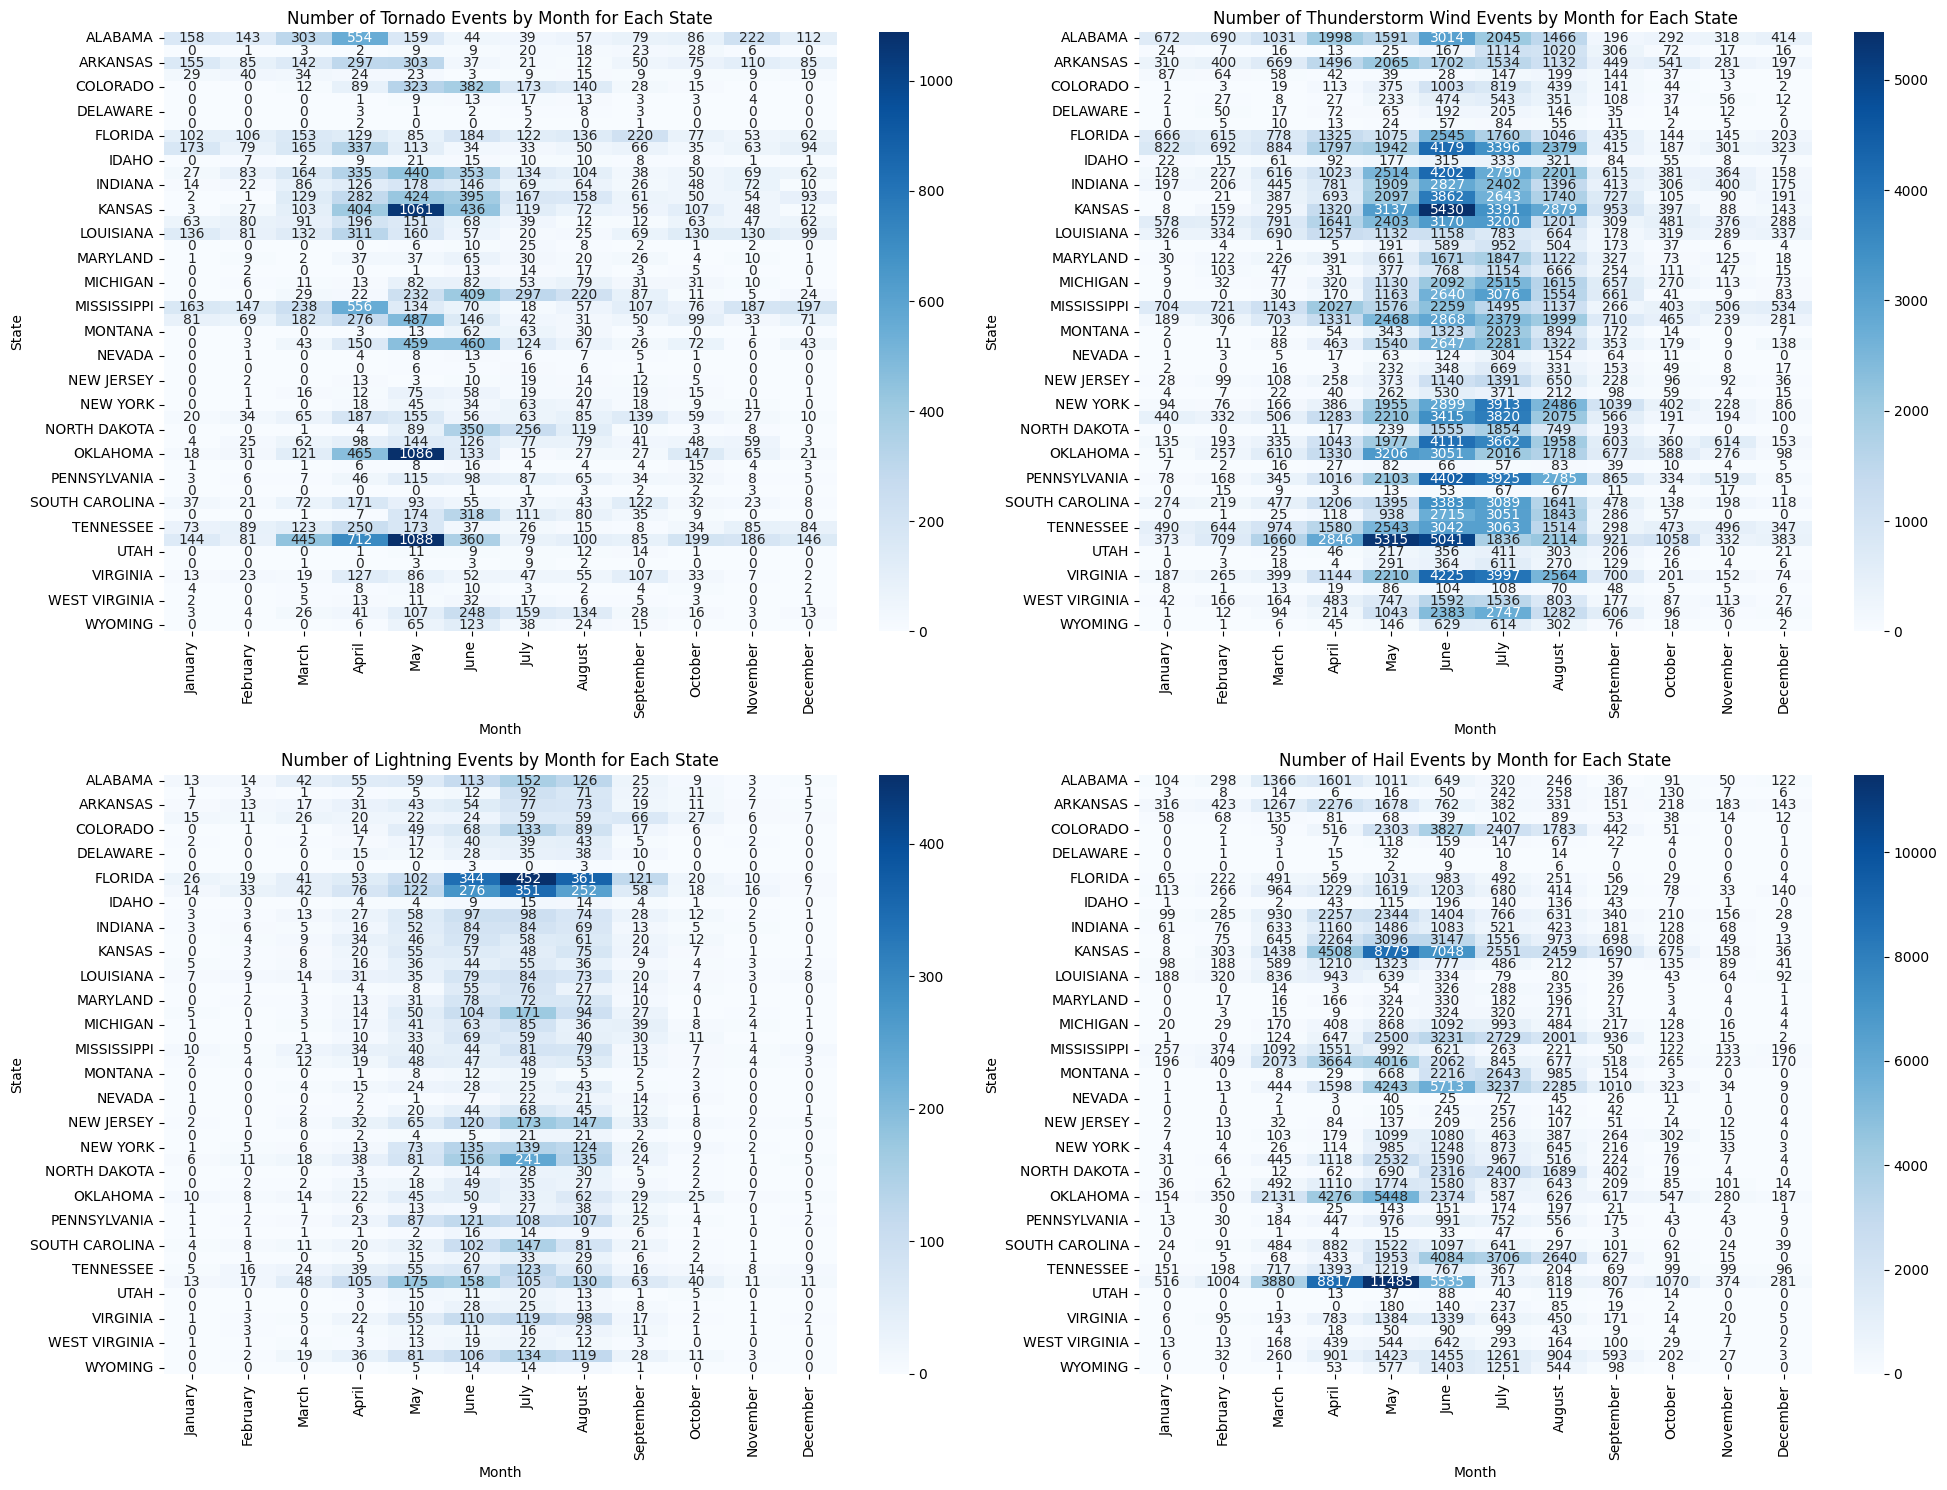

In [31]:

# Function to create a pivot table for a given event type
def create_pivot_table(event_type):
    event_df = df[df['EVENT_TYPE'] == event_type]
    event_counts_by_state_month = event_df.groupby(['STATE', 'MONTH_NAME']).size().reset_index(name='count')
    pivot_table = event_counts_by_state_month.pivot(index='STATE', columns='MONTH_NAME', values='count').fillna(0)
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    pivot_table = pivot_table[month_order]
    return pivot_table

# Create pivot tables for each event type
tornado_pivot = create_pivot_table('Tornado')
thunderstorm_wind_pivot = create_pivot_table('Thunderstorm Wind')
lightning_pivot = create_pivot_table('Lightning')
hail_pivot = create_pivot_table('Hail')

# Plot the heatmaps in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

sns.heatmap(tornado_pivot, cmap='Blues', annot=True, fmt='g', ax=axes[0, 0])
axes[0, 0].set_title('Number of Tornado Events by Month for Each State')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('State')

sns.heatmap(thunderstorm_wind_pivot, cmap='Blues', annot=True, fmt='g', ax=axes[0, 1])
axes[0, 1].set_title('Number of Thunderstorm Wind Events by Month for Each State')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('State')

sns.heatmap(lightning_pivot, cmap='Blues', annot=True, fmt='g', ax=axes[1, 0])
axes[1, 0].set_title('Number of Lightning Events by Month for Each State')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('State')

sns.heatmap(hail_pivot, cmap='Blues', annot=True, fmt='g', ax=axes[1, 1])
axes[1, 1].set_title('Number of Hail Events by Month for Each State')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('State')

plt.tight_layout()
plt.show()

Florida & Georgia get more lightning than other states.  Texas, Kansas, and Oklahoma get more hail events than other states.  I don't like the above charts though because they skip the names of every other state.  But, we have an idea of when thunderstorms and related events occur.  Let's look at how big the tornados are.  Tornados are ranked on the Fujita Scale, which goes from F0 to F5.  We can look at when do the different sizes of tornados occur; and, what places.  It looks like there will be a spatial component later as well.  But let's ee what we can do now.

In [32]:
# Get the unique values of the TOR_F_SCALE column
tor_f_scale_values = df['TOR_F_SCALE'].unique()

# Print the unique values
print(tor_f_scale_values)

[nan 'F2' 'F0' 'F1' 'F3' 'F4' 'F5' 'EF0' 'EF2' 'EF1' 'EF3' 'EF4' 'EF5'
 'EFU']


In 2000 the Fujita Tornado Scale was enhanced to become the Enhanced Fujita Tornado scale.  The distinction between the two was a damage component of the scale. An F5 is equivalent to an EF5.  An additional value EFU for unknown was also created.  We will omit the EFU and NaN values and combine the others together.

In [33]:

# Filter for tornado events
tornado_df = df[df['EVENT_TYPE'] == 'Tornado'].copy()

# Normalize the TOR_F_SCALE values to a common scale (F0-F5)
tornado_df.loc[:, 'TOR_F_SCALE'] = tornado_df['TOR_F_SCALE'].replace({
    'EF0': 'F0', 'EF1': 'F1', 'EF2': 'F2', 'EF3': 'F3', 'EF4': 'F4', 'EF5': 'F5'
})

# List of tornado scales
tornado_scales = ['F0', 'F1', 'F2', 'F3', 'F4', 'F5']

# List of all months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Function to create a pivot table for a given TOR_F_SCALE value
def create_pivot_table(f_scale):
    event_df = tornado_df[tornado_df['TOR_F_SCALE'] == f_scale]
    event_counts_by_state_month = event_df.groupby(['STATE', 'MONTH_NAME']).size().reset_index(name='count')
    pivot_table = event_counts_by_state_month.pivot(index='STATE', columns='MONTH_NAME', values='count').fillna(0)
    pivot_table = pivot_table.reindex(columns=month_order, fill_value=0)
    return pivot_table

# Create pivot tables for each tornado scale
pivot_tables = {scale: create_pivot_table(scale) for scale in tornado_scales}

# Function to update the heatmap based on the slider value
def update_heatmap(scale):
    plt.figure(figsize=(15, 10))
    sns.heatmap(pivot_tables[scale], cmap='Blues', annot=True, fmt='g')
    plt.title(f'Number of Tornado Events by Month for Each State (TOR_F_SCALE: {scale})')
    plt.xlabel('Month')
    plt.ylabel('State')
    plt.show()

# Create a slider widget
scale_slider = widgets.SelectionSlider(
    options=tornado_scales,
    value='F0',
    description='FUJITA SCALE:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

# Create an interactive widget
interactive_plot = widgets.interactive(update_heatmap, scale=scale_slider)

# Display the interactive widget
display(interactive_plot)

interactive(children=(SelectionSlider(continuous_update=False, description='FUJITA SCALE:', options=('F0', 'F1…

Ok, so some states really stand out here.  Kansas and Texas both have nearly the same number of F0 Tornados in the month of May.  Kansas is also a lot smaller than Texas.  We'll keep the question of adjusting for the size of the state for part 3.  What if we just look at the fujita scale and month?

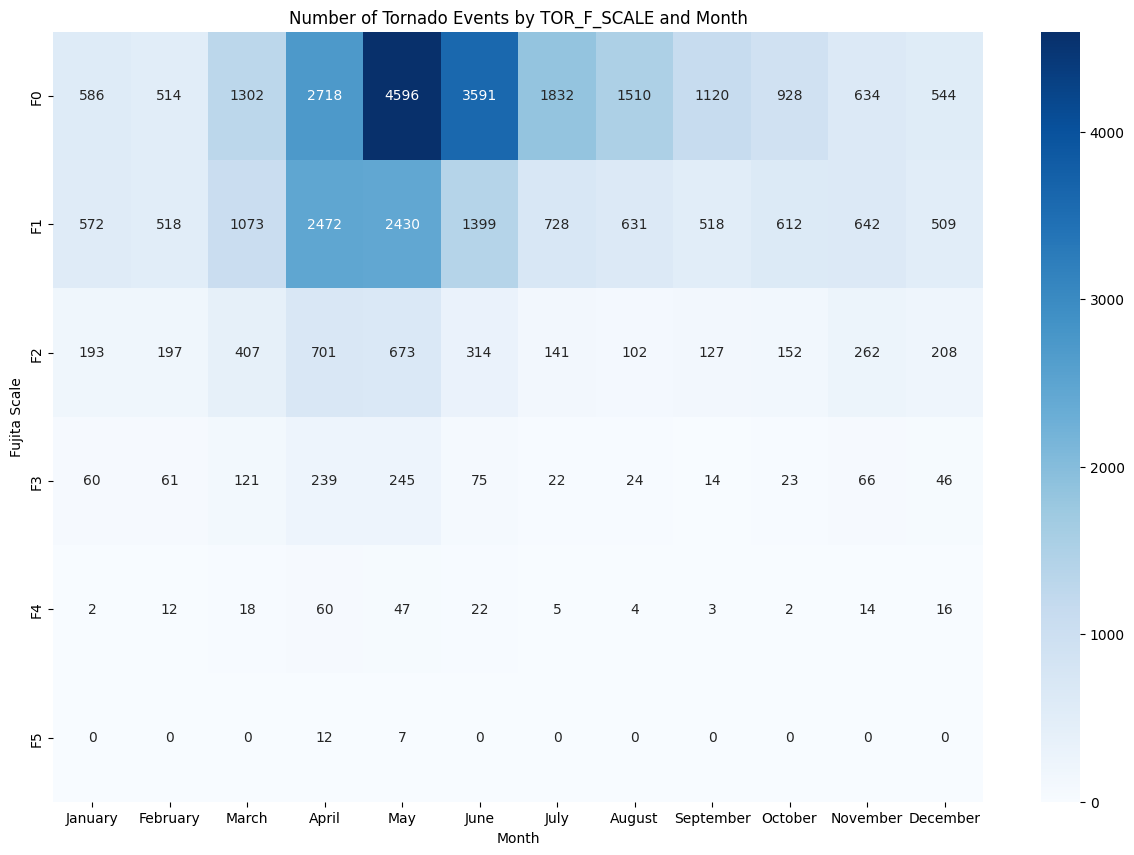

In [34]:
# Filter for tornado events and omit NaN and EFU
tornado_df = df[(df['EVENT_TYPE'] == 'Tornado') & (df['TOR_F_SCALE'].notna()) & (df['TOR_F_SCALE'] != 'EFU')].copy()

# Normalize the TOR_F_SCALE values to a common scale (F0-F5)
tornado_df['TOR_F_SCALE'] = tornado_df['TOR_F_SCALE'].replace({
    'EF0': 'F0', 'EF1': 'F1', 'EF2': 'F2', 'EF3': 'F3', 'EF4': 'F4', 'EF5': 'F5'
})

# Group by TOR_F_SCALE and month name and count the number of tornado events
tornado_counts_by_scale_month = tornado_df.groupby(['TOR_F_SCALE', 'MONTH_NAME']).size().reset_index(name='count')

# Pivot the data to have TOR_F_SCALE as rows and month names as columns
pivot_table = tornado_counts_by_scale_month.pivot(index='TOR_F_SCALE', columns='MONTH_NAME', values='count').fillna(0)

# Reorder the columns to ensure the months are in the correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
pivot_table = pivot_table[month_order]

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='g')

# Add title and labels
plt.title('Number of Tornado Events by TOR_F_SCALE and Month')
plt.xlabel('Month')
plt.ylabel('Fujita Scale')

# Show the plot
plt.show()

This graphic condenses the information down from before.  May and June are the most common months for tornados; However, the largest tornados (F4 and F5) have only ever occured in April and May.  What about by year?  IS there a pattern in the number of tornados by year?

In [35]:
# Normalize the tornado scale values to a common scale (F0-F5)
df['TOR_F_SCALE'] = df['TOR_F_SCALE'].replace({
    'EF0': 'F0', 'EF1': 'F1', 'EF2': 'F2', 'EF3': 'F3', 'EF4': 'F4', 'EF5': 'F5'
})

# Filter for tornado events
tornado_df = df[df['EVENT_TYPE'] == 'Tornado']

# Group by year and tornado scale, and count the number of tornadoes
tornado_counts_by_year_scale = tornado_df.groupby(['YEAR', 'TOR_F_SCALE']).size().reset_index(name='count')

# Generate descriptive statistics for the number of tornadoes per year for each scale
tornado_stats_by_scale = tornado_counts_by_year_scale.groupby('TOR_F_SCALE')['count'].describe()

# Display the statistics
print(tornado_stats_by_scale)

             count        mean         std    min    25%    50%     75%  \
TOR_F_SCALE                                                               
EFU            9.0  141.444444   88.041341   18.0   67.0  171.0  199.00   
F0            27.0  736.111111  188.968116  440.0  588.0  729.0  853.00   
F1            27.0  448.296296  128.257798  243.0  361.5  416.0  521.50   
F2            27.0  128.777778   41.320821   80.0   99.0  121.0  143.00   
F3            27.0   36.888889   17.856982   12.0   25.5   33.0   42.00   
F4            26.0    7.884615    6.592887    1.0    3.0    8.0    9.75   
F5             6.0    3.166667    3.920034    1.0    1.0    1.5    2.75   

                max  
TOR_F_SCALE          
EFU           271.0  
F0           1265.0  
F1            780.0  
F2            270.0  
F3             97.0  
F4             32.0  
F5             11.0  


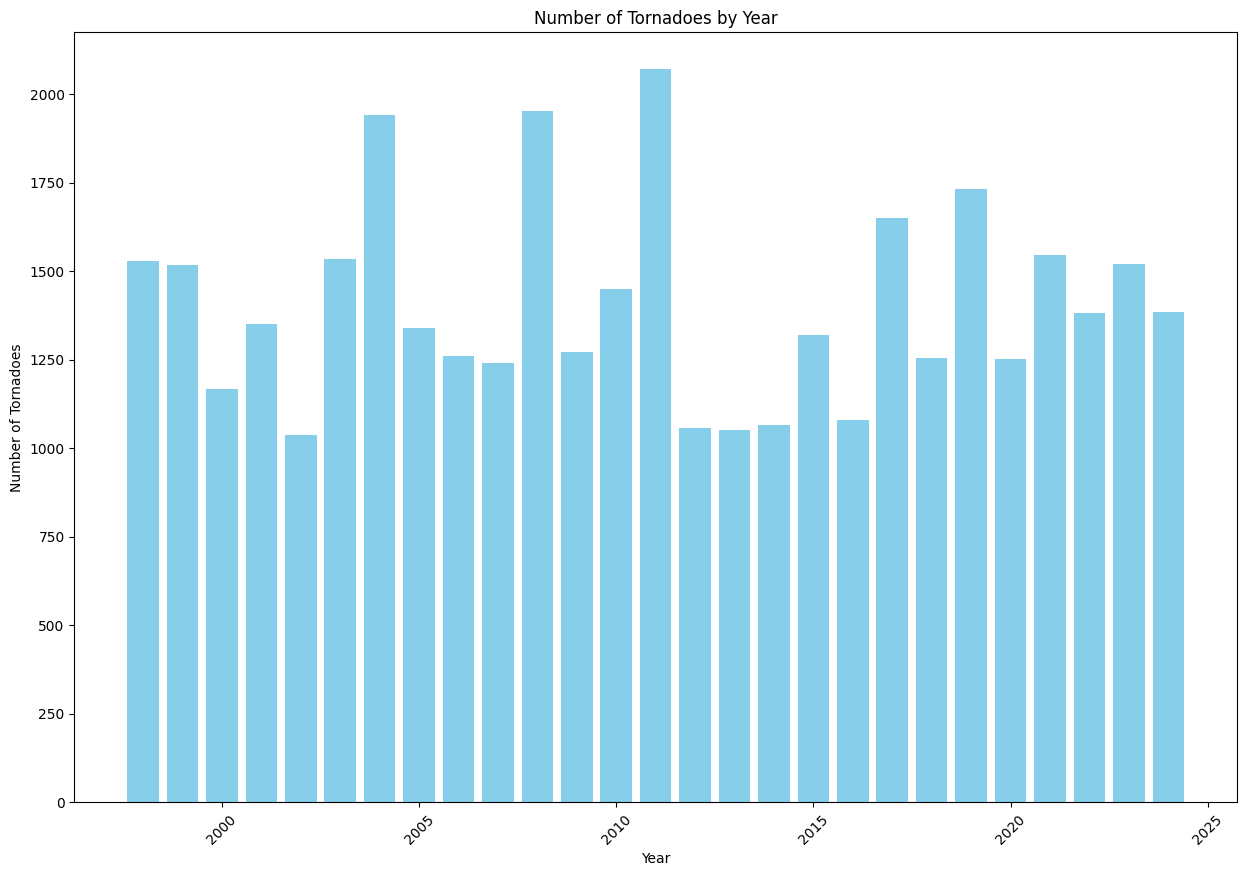

In [36]:
# Group by year and count the number of tornadoes
tornado_counts_by_year = df[df['EVENT_TYPE'] == 'Tornado'].groupby('YEAR').size().reset_index(name='count')

# Plot the bar chart
plt.figure(figsize=(15, 10))
plt.bar(tornado_counts_by_year['YEAR'], tornado_counts_by_year['count'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Tornadoes')
plt.title('Number of Tornadoes by Year')
plt.xticks(rotation=45)
plt.show()

There doesn't seem to be a pattern here in terms of increasing or decreasing.  2004, 2008, and 2011 had a lot!  Do we see anything if we only look at the largest (F4 and F5) tornados?

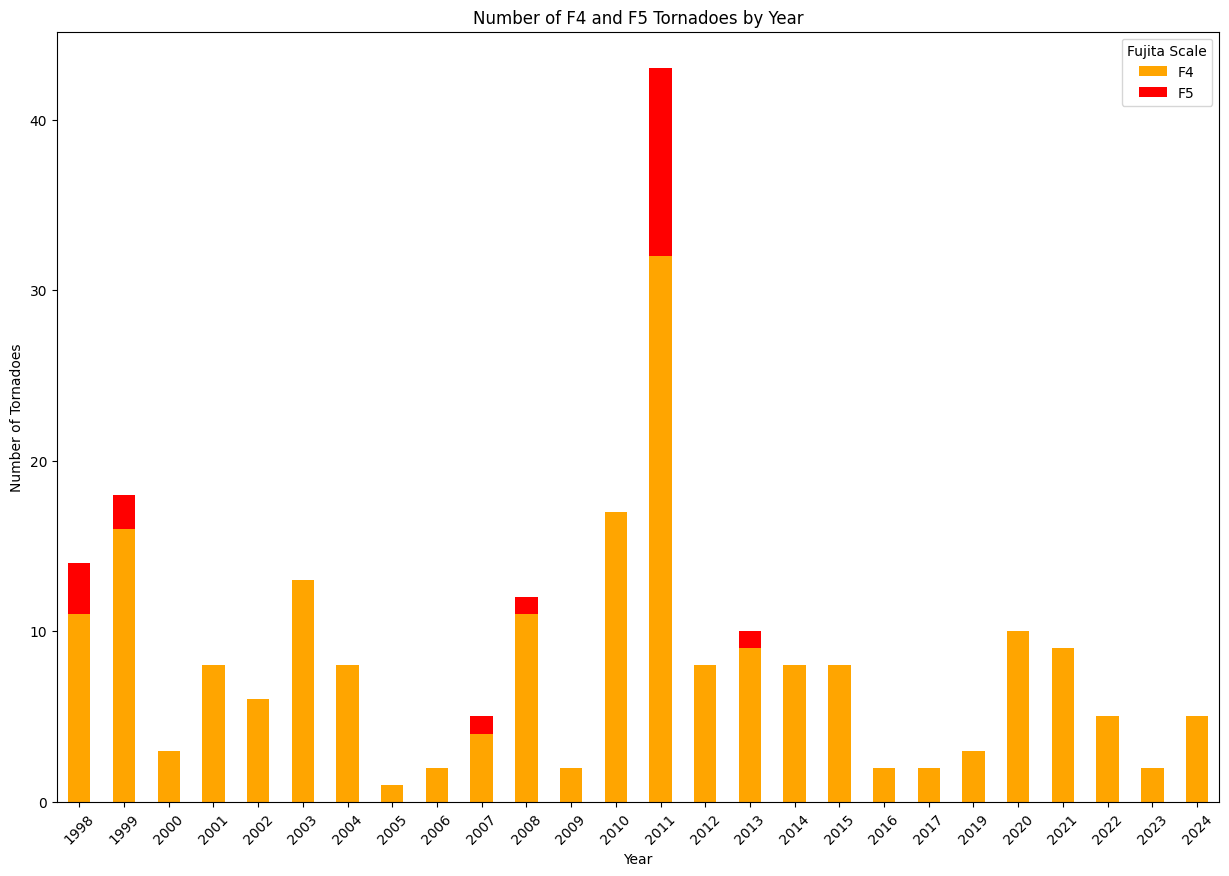

In [37]:
# Filter for F4 and F5 tornado events and normalize the TOR_F_SCALE values
f4_f5_tornado_df = df[(df['EVENT_TYPE'] == 'Tornado') & (df['TOR_F_SCALE'].isin(['F4', 'F5', 'EF4', 'EF5']))].copy()
f4_f5_tornado_df['TOR_F_SCALE'] = f4_f5_tornado_df['TOR_F_SCALE'].replace({'EF4': 'F4', 'EF5': 'F5'})

# Group by year and TOR_F_SCALE, then count the number of tornadoes
f4_f5_tornado_counts_by_year = f4_f5_tornado_df.groupby(['YEAR', 'TOR_F_SCALE']).size().reset_index(name='count')

# Pivot the data to have years as rows and TOR_F_SCALE as columns
pivot_table_f4_f5 = f4_f5_tornado_counts_by_year.pivot(index='YEAR', columns='TOR_F_SCALE', values='count').fillna(0)

# Plot the bar chart
pivot_table_f4_f5.plot(kind='bar', stacked=True, figsize=(15, 10), color={'F4': 'orange', 'F5': 'red'})
plt.xlabel('Year')
plt.ylabel('Number of Tornadoes')
plt.title('Number of F4 and F5 Tornadoes by Year')
plt.xticks(rotation=45)
plt.legend(title='Fujita Scale')
plt.show()

Wow!, look at 2011! We also have not had an F5 tornado since 2013.

In [38]:
from scipy.stats import poisson

# Historical data on the number of F5 tornadoes per year
f5_tornadoes_per_year = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Calculate the average rate (λ)
lambda_f5 = np.mean(f5_tornadoes_per_year)
print(f"Average number of F5 tornadoes per year (λ): {lambda_f5}")

# Calculate the probability of having at least one F5 tornado next year
prob_at_least_one_f5 = 1 - poisson.pmf(0, lambda_f5)
print(f"Probability of having at least one F5 tornado next year: {prob_at_least_one_f5:.4f}")

Average number of F5 tornadoes per year (λ): 0.02
Probability of having at least one F5 tornado next year: 0.0198


I am not sure if this is a useful statistic yet.  I might talk about it later.

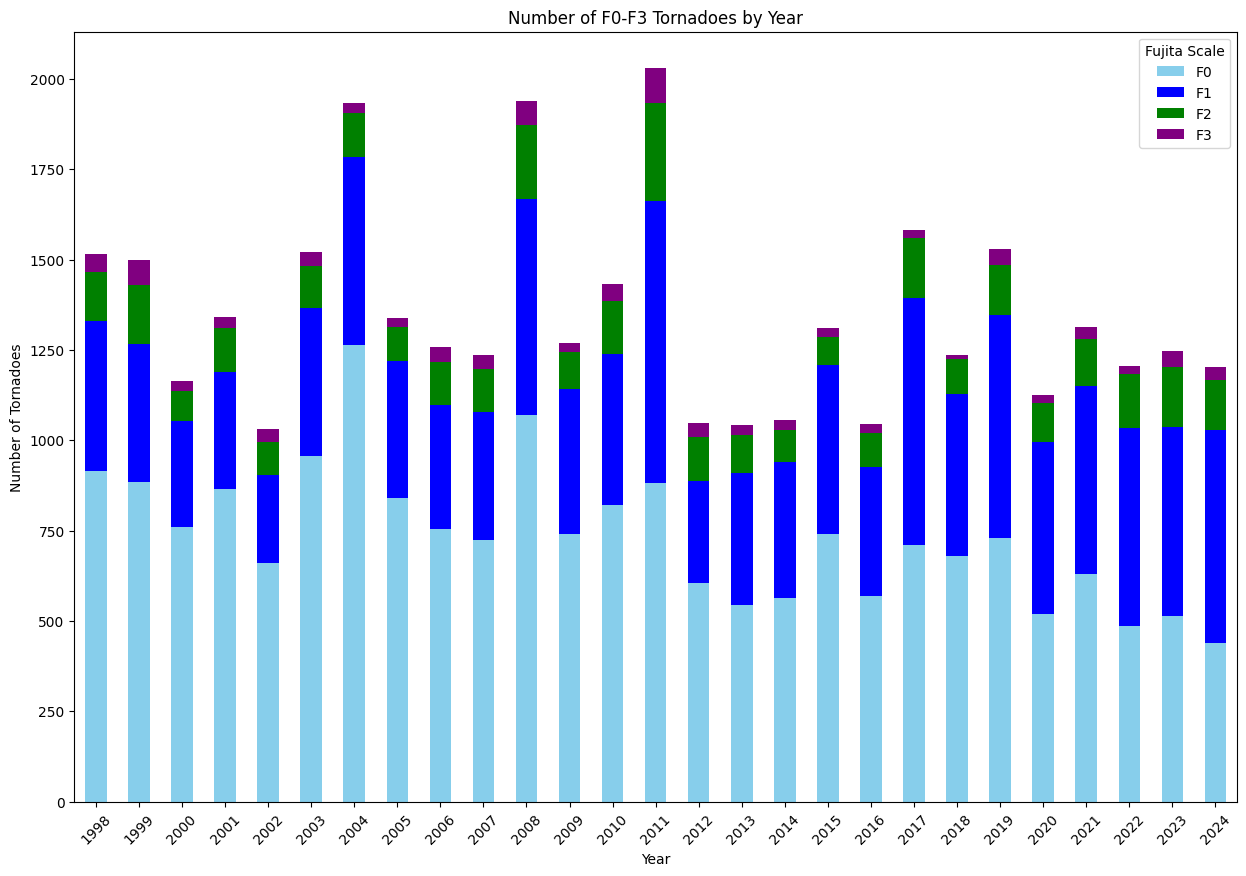

In [39]:
# Filter for F0-F3 tornado events and normalize the TOR_F_SCALE values
f0_f3_tornado_df = df[(df['EVENT_TYPE'] == 'Tornado') & (df['TOR_F_SCALE'].isin(['F0', 'F1', 'F2', 'F3', 'EF0', 'EF1', 'EF2', 'EF3']))].copy()
f0_f3_tornado_df['TOR_F_SCALE'] = f0_f3_tornado_df['TOR_F_SCALE'].replace({'EF0': 'F0', 'EF1': 'F1', 'EF2': 'F2', 'EF3': 'F3'})

# Group by year and TOR_F_SCALE, then count the number of tornadoes
f0_f3_tornado_counts_by_year = f0_f3_tornado_df.groupby(['YEAR', 'TOR_F_SCALE']).size().reset_index(name='count')

# Pivot the data to have years as rows and TOR_F_SCALE as columns
pivot_table_f0_f3 = f0_f3_tornado_counts_by_year.pivot(index='YEAR', columns='TOR_F_SCALE', values='count').fillna(0)

# Plot the bar chart
pivot_table_f0_f3.plot(kind='bar', stacked=True, figsize=(15, 10), color={'F0': 'skyblue', 'F1': 'blue', 'F2': 'green', 'F3': 'purple'})
plt.xlabel('Year')
plt.ylabel('Number of Tornadoes')
plt.title('Number of F0-F3 Tornadoes by Year')
plt.xticks(rotation=45)
plt.legend(title='Fujita Scale')
plt.show()

Do my eyes deceive me or does it appear that the smaller F0 tornado numbers are decreasing and F1 tornados are increasing?  Let's see if there's a better way to look at this.

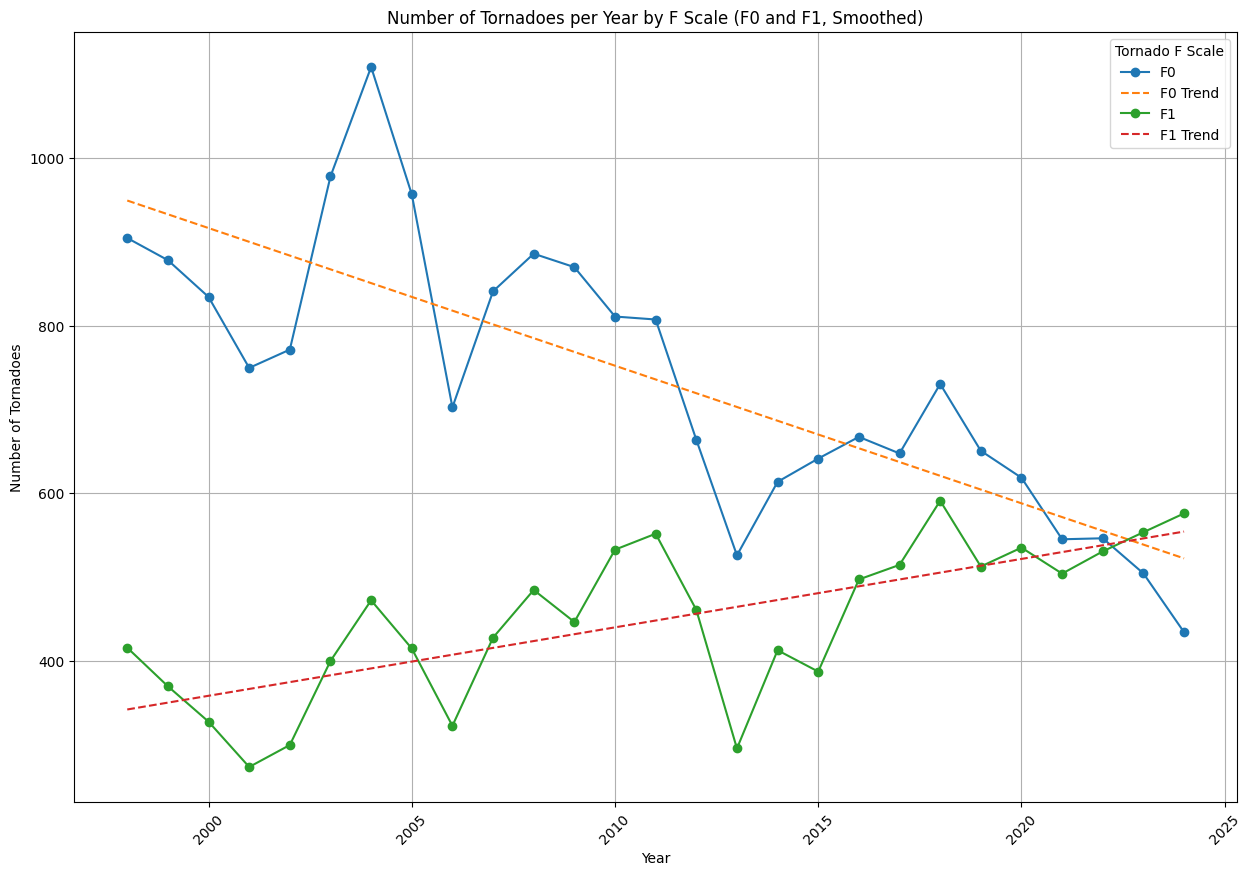

In [40]:
from scipy.signal import savgol_filter

# Filter for tornado events and omit NaN and EFU
tornado_df = df[(df['EVENT_TYPE'] == 'Tornado') & (df['TOR_F_SCALE'].notna()) & (df['TOR_F_SCALE'] != 'EFU')].copy()

# Normalize the TOR_F_SCALE values to a common scale (F0-F5)
tornado_df['TOR_F_SCALE'] = tornado_df['TOR_F_SCALE'].replace({
    'EF0': 'F0', 'EF1': 'F1', 'EF2': 'F2', 'EF3': 'F3', 'EF4': 'F4', 'EF5': 'F5'
})

# Filter to include only F0 and F1 tornadoes
tornado_df = tornado_df[tornado_df['TOR_F_SCALE'].isin(['F0', 'F1'])]

# Group by year and tornado scale, and count the number of tornadoes
tornado_counts_by_year_scale = tornado_df.groupby(['YEAR', 'TOR_F_SCALE']).size().reset_index(name='count')

# Pivot the data to have years as rows and tornado scales as columns
pivot_df = tornado_counts_by_year_scale.pivot(index='YEAR', columns='TOR_F_SCALE', values='count').fillna(0)

# Plot the line graph
plt.figure(figsize=(15, 10))

# Plot each tornado scale as a separate line and apply smoothing
for scale in pivot_df.columns:
    y = pivot_df[scale]
    y_smooth = savgol_filter(y, window_length=5, polyorder=2)  # Adjust window_length and polyorder as needed
    plt.plot(pivot_df.index, y_smooth, marker='o', linestyle='-', label=scale)
    
    # Add trend line
    x = pivot_df.index.values
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), linestyle='--', label=f'{scale} Trend')

plt.xlabel('Year')
plt.ylabel('Number of Tornadoes')
plt.title('Number of Tornadoes per Year by F Scale (F0 and F1, Smoothed)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Tornado F Scale')
plt.show()

So my eyes weren't deceiving me.  There does appear to be a decrease in F0 tornados and an increase in F1.  The question to ask is if this is real, or is this a byproduct of measurement changes.

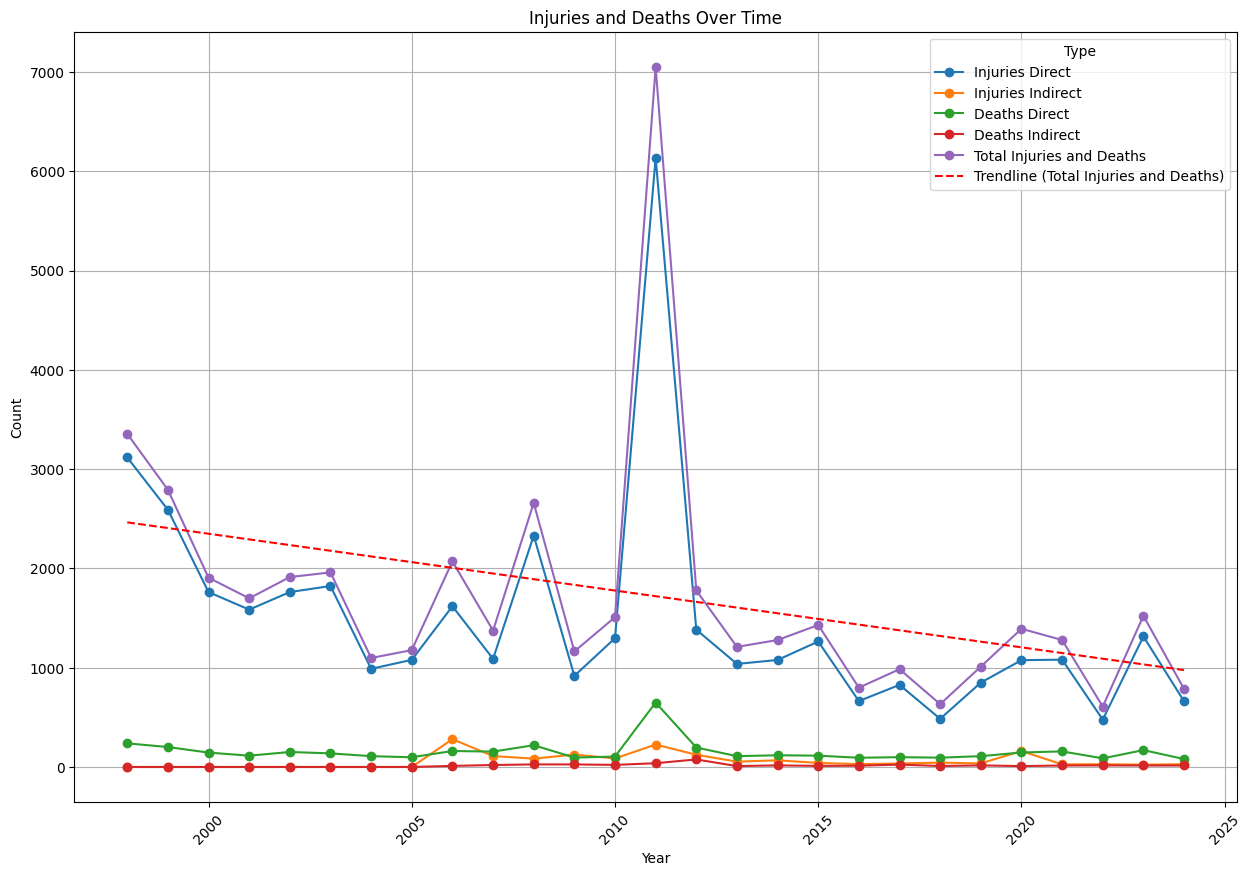

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Group by year and sum the injuries and deaths
injuries_deaths_by_year = df.groupby('YEAR')[['INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'total_injuries_deaths']].sum().reset_index()

# Plot the line chart
plt.figure(figsize=(15, 10))
plt.plot(injuries_deaths_by_year['YEAR'], injuries_deaths_by_year['INJURIES_DIRECT'], marker='o', linestyle='-', label='Injuries Direct')
plt.plot(injuries_deaths_by_year['YEAR'], injuries_deaths_by_year['INJURIES_INDIRECT'], marker='o', linestyle='-', label='Injuries Indirect')
plt.plot(injuries_deaths_by_year['YEAR'], injuries_deaths_by_year['DEATHS_DIRECT'], marker='o', linestyle='-', label='Deaths Direct')
plt.plot(injuries_deaths_by_year['YEAR'], injuries_deaths_by_year['DEATHS_INDIRECT'], marker='o', linestyle='-', label='Deaths Indirect')
plt.plot(injuries_deaths_by_year['YEAR'], injuries_deaths_by_year['total_injuries_deaths'], marker='o', linestyle='-', label='Total Injuries and Deaths')

# Add trendline for total injuries and deaths
x = injuries_deaths_by_year['YEAR']
y = injuries_deaths_by_year['total_injuries_deaths']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), linestyle='--', color='r', label='Trendline (Total Injuries and Deaths)')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Injuries and Deaths Over Time')
plt.legend(title='Type')
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()

Indirect deaths and injuries seem to be quite minimal.  The metadata is not clear as to what constitutes an indirect injury or death.  2011, which we previously identified as a year with many F4 and F5 tornados, also saw an increase in injuries and deaths. 
The trendline does show that injuries and deaths from thunderstorm related events are decreasing over the past 25 years.  

<Figure size 1500x1000 with 0 Axes>

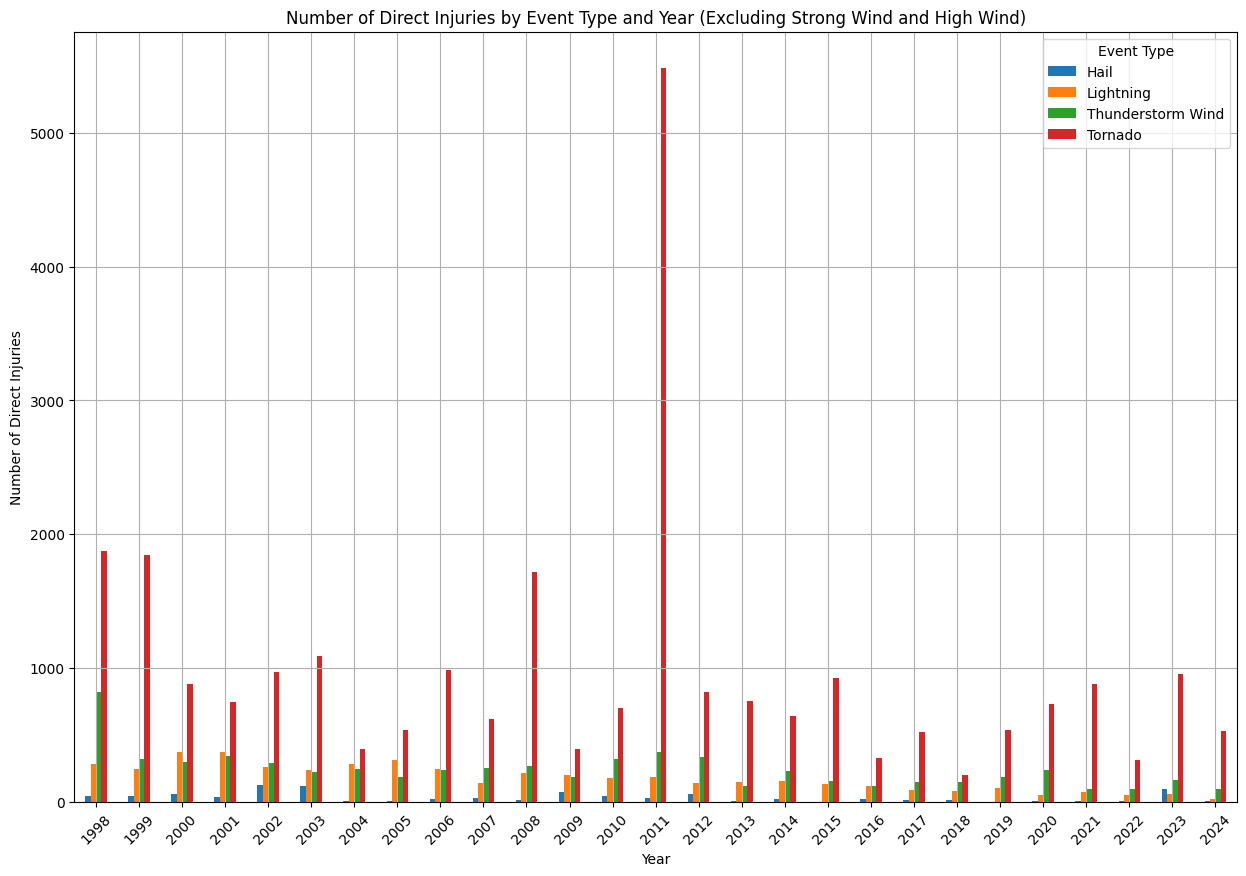

<Figure size 1500x1000 with 0 Axes>

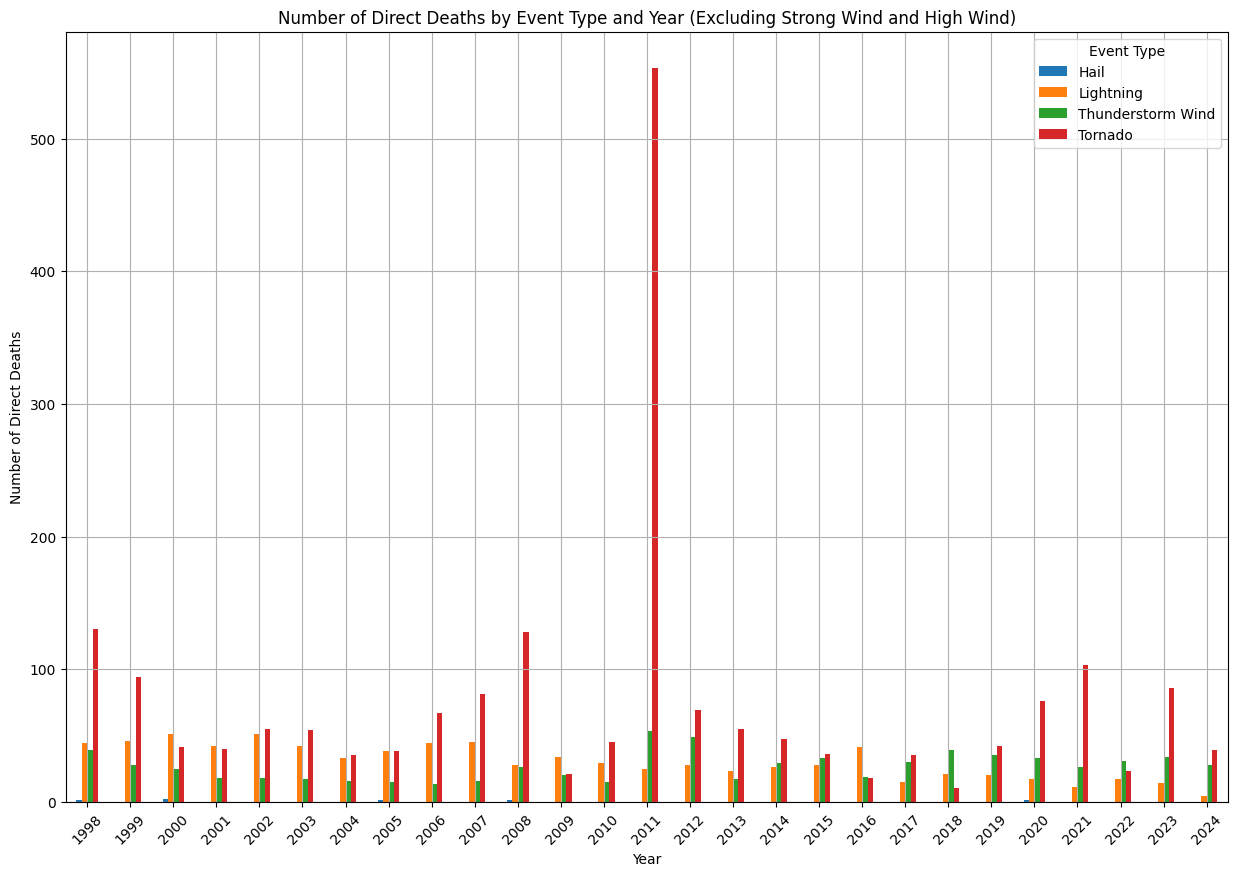

In [50]:
import matplotlib.pyplot as plt

# Group by year and event type, then sum the direct injuries and deaths
injuries_deaths_by_event_year = df.groupby(['YEAR', 'EVENT_TYPE'])[['INJURIES_DIRECT', 'DEATHS_DIRECT']].sum().reset_index()

# Exclude "Strong Wind" and "High Wind" event types
excluded_events = ['Strong Wind', 'High Wind']
filtered_df = injuries_deaths_by_event_year[~injuries_deaths_by_event_year['EVENT_TYPE'].isin(excluded_events)]

# Pivot the data to have years as rows and event types as columns for injuries and deaths
injuries_pivot = filtered_df.pivot(index='YEAR', columns='EVENT_TYPE', values='INJURIES_DIRECT').fillna(0)
deaths_pivot = filtered_df.pivot(index='YEAR', columns='EVENT_TYPE', values='DEATHS_DIRECT').fillna(0)

# Plot the bar chart for direct injuries
plt.figure(figsize=(15, 10))
injuries_pivot.plot(kind='bar', stacked=False, figsize=(15, 10))
plt.xlabel('Year')
plt.ylabel('Number of Direct Injuries')
plt.title('Number of Direct Injuries by Event Type and Year (Excluding Strong Wind and High Wind)')
plt.legend(title='Event Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot the bar chart for direct deaths
plt.figure(figsize=(15, 10))
deaths_pivot.plot(kind='bar', stacked=False, figsize=(15, 10))
plt.xlabel('Year')
plt.ylabel('Number of Direct Deaths')
plt.title('Number of Direct Deaths by Event Type and Year (Excluding Strong Wind and High Wind)')
plt.legend(title='Event Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In every year of the past 25 years, tornados were the leading cause of direct injury.  However, this is not the case for direct deaths.  In some years, such as 2000, 2001, 2009 and 2016, lightning deaths outnumbered tornado deaths.  In 2018 and 2022, wind was actually the leading cause of death.

# 3) Experimental Geospatial EDA
## An attempt at creating maps with python and matplotlib

Checking data types.  Backstory - STATEFP and STATEFIPS should have matched; however, they caused me some trouble in jouning the two together.  In took a bit of detective work to find the error.  You can see the #'d out code from my problem solving in the code for the map. 

A second dataset has been introduced here.  It is a shape file from the US Census.  

In [43]:
# Filter for tornado events
tornado_df = df[df['EVENT_TYPE'] == 'Tornado']

# Load the shapefile for US states
shapefile_path = 'shp/cb_2018_us_state_20m.shp'
gdf = gpd.read_file(shapefile_path)

# Check the data types of the columns
print("Data type of STATEFP in GeoDataFrame:", gdf['STATEFP'].dtype)
print("Data type of STATE_FIPS in DataFrame:", df['STATE_FIPS'].dtype)

# Convert STATE_FIPS to string and remove decimal points
df['STATE_FIPS'] = df['STATE_FIPS'].astype(int).astype(str).str.zfill(2)

# Check the data types again
print("Data type of STATEFP in GeoDataFrame after conversion:", gdf['STATEFP'].dtype)
print("Data type of STATE_FIPS in DataFrame after conversion:", df['STATE_FIPS'].dtype)

# Print the first few rows to check the data
print("GeoDataFrame:")
print(gdf[['STATEFP', 'STUSPS']].head())

# Print the first few rows to check the data
print("DataFrame:")
print(df[['STATE_FIPS', 'STATE']].head())

Data type of STATEFP in GeoDataFrame: object
Data type of STATE_FIPS in DataFrame: float64
Data type of STATEFP in GeoDataFrame after conversion: object
Data type of STATE_FIPS in DataFrame after conversion: object
GeoDataFrame:
  STATEFP STUSPS
0      24     MD
1      19     IA
2      10     DE
3      39     OH
4      42     PA
DataFrame:
  STATE_FIPS       STATE
0         39        OHIO
3         35  NEW MEXICO
4         13     GEORGIA
7         40    OKLAHOMA
8         29    MISSOURI


In [44]:
print("GeoDataFrame:")
print(gdf.head())
print(gdf.shape)

GeoDataFrame:
  STATEFP   STATENS     AFFGEOID GEOID STUSPS          NAME LSAD  \
0      24  01714934  0400000US24    24     MD      Maryland   00   
1      19  01779785  0400000US19    19     IA          Iowa   00   
2      10  01779781  0400000US10    10     DE      Delaware   00   
3      39  01085497  0400000US39    39     OH          Ohio   00   
4      42  01779798  0400000US42    42     PA  Pennsylvania   00   

          ALAND       AWATER  \
0   25151100280   6979966958   
1  144661267977   1084180812   
2    5045925646   1399985648   
3  105828882568  10268850702   
4  115884442321   3394589990   

                                            geometry  
0  MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...  
1  POLYGON ((-96.62187 42.77926, -96.57794 42.827...  
2  POLYGON ((-75.77379 39.7222, -75.75323 39.7579...  
3  MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...  
4  POLYGON ((-80.51989 40.90666, -80.51964 40.987...  
(52, 10)


The newly introduced data includes the geometry info for making maps.  However, we also have the piece of information that we wanted for controlling by area.  From the metadata, ALAND is in square meters.

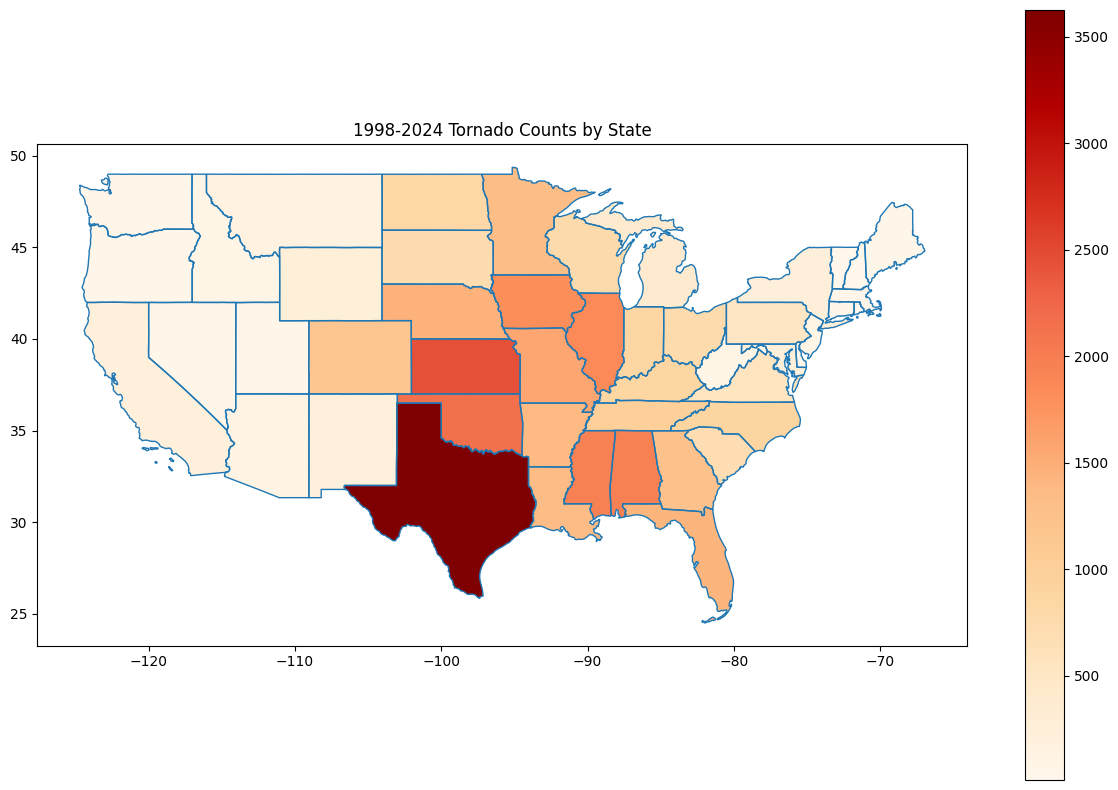

In [45]:
# Filter for tornado events
tornado_df = df[df['EVENT_TYPE'] == 'Tornado']

# Check if the filtered DataFrame is empty
if tornado_df.empty:
    print("No tornado events found in the DataFrame.")

# Group by state abbreviation and count the number of tornadoes
tornado_counts_by_state = tornado_df.groupby('STATE_FIPS').size().reset_index(name='count')

# print(tornado_counts_by_state) # Trouble shooting the code

# Load the shapefile for US states
shapefile_path = 'shp/cb_2018_us_state_20m.shp'
gdf = gpd.read_file(shapefile_path)

# List of state fips codes for the 48 contiguous US states
contiguous_fips_states = [
    '01', '04', '05', '06', '08', '09', '10', '12', '13', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', 
    '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '44', '45', 
    '46', '47', '48', '49', '50', '51', '53', '54', '55', '56'
]

# Filter the GeoDataFrame to include only the contiguous states
gdf_contiguous = gdf[gdf['STATEFP'].isin(contiguous_fips_states)]

# print(gdf_contiguous) # trouble shooting the code

# Merge the tornado data with the state geometries
merged = gdf_contiguous.merge(tornado_counts_by_state, left_on='STATEFP', right_on='STATE_FIPS', how='left')

# print(merged) # trouble shooting the code

# Check if the merged DataFrame contains count column and print no count column
if 'count' not in merged.columns:
    print("No tornado events found in the contiguous US states.")

# Check if the merged DataFrame is empty
if merged.empty:
    print("No common states found between the shapefile and tornado data.")

# Check for missing geometries
merged = merged[merged.geometry.notnull()]

# Validate geometries
merged = merged[merged.is_valid]

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf_contiguous.boundary.plot(ax=ax, linewidth=1)
merged.plot(column='count', ax=ax, legend=True, cmap='OrRd', missing_kwds={"color": "lightgrey"})

plt.title('1998-2024 Tornado Counts by State')
plt.show()

The above map was my first successful plot of a map.  So that is a win.  However, there's a problem in that the number of tornados by state is biased.  Texas has more tornados; but it is also a larger state.  We need to divide the number of tornados by area.  

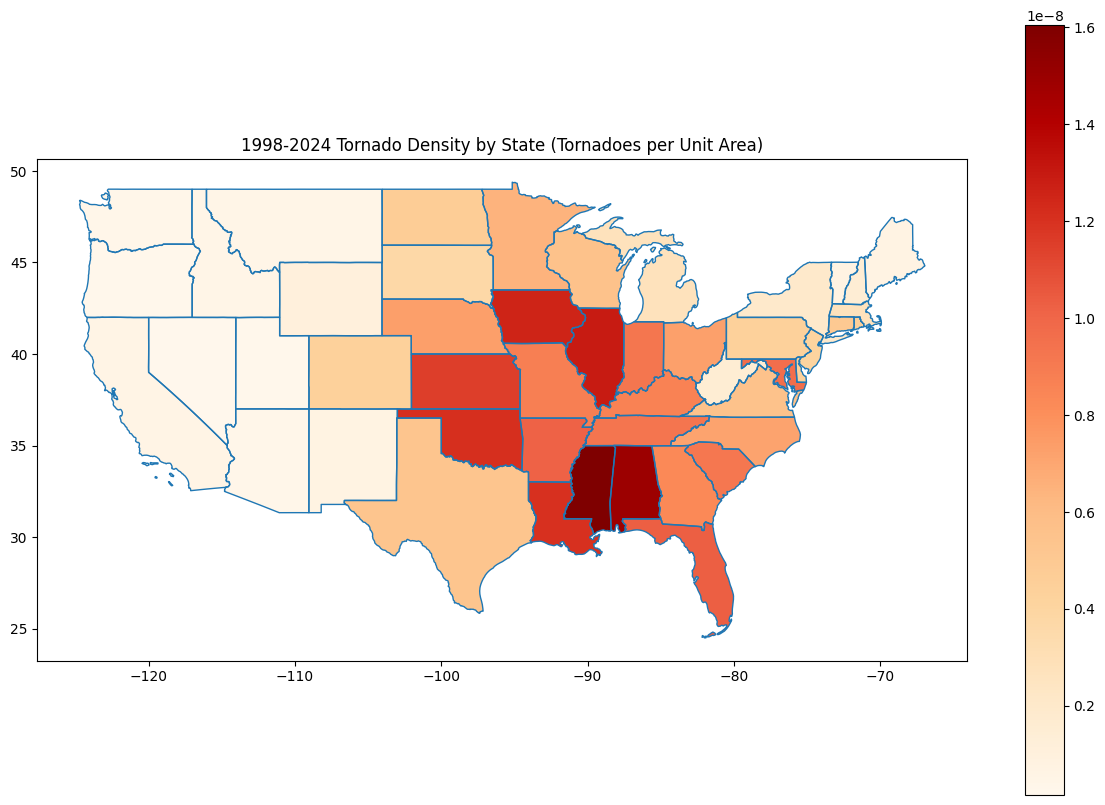

In [46]:
# Filter for tornado events
tornado_df = df[df['EVENT_TYPE'] == 'Tornado']

# Check if the filtered DataFrame is empty
if tornado_df.empty:
    print("No tornado events found in the DataFrame.")

# Group by state abbreviation and count the number of tornadoes
tornado_counts_by_state = tornado_df.groupby('STATE_FIPS').size().reset_index(name='count')

# Load the shapefile for US states
shapefile_path = 'shp/cb_2018_us_state_20m.shp'
gdf = gpd.read_file(shapefile_path)

# List of state fips codes for the 48 contiguous US states
contiguous_fips_states = [
    '01', '04', '05', '06', '08', '09', '10', '12', '13', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', 
    '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '44', '45', 
    '46', '47', '48', '49', '50', '51', '53', '54', '55', '56'
]

# Filter the GeoDataFrame to include only the contiguous states
gdf_contiguous = gdf[gdf['STATEFP'].isin(contiguous_fips_states)]

# Merge the tornado data with the state geometries
merged = gdf_contiguous.merge(tornado_counts_by_state, left_on='STATEFP', right_on='STATE_FIPS', how='left')

# Check if the merged DataFrame contains count column and print no count column
if 'count' not in merged.columns:
    print("No tornado events found in the contiguous US states.")

# Check if the merged DataFrame is empty
if merged.empty:
    print("No common states found between the shapefile and tornado data.")

# Check for missing geometries
merged = merged[merged.geometry.notnull()]

# Validate geometries
merged = merged[merged.is_valid]

# Calculate tornado density (number of tornadoes per unit area)
merged['tornado_density'] = merged['count'] / merged['ALAND']

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf_contiguous.boundary.plot(ax=ax, linewidth=1)
merged.plot(column='tornado_density', ax=ax, legend=True, cmap='OrRd', missing_kwds={"color": "lightgrey"})

plt.title('1998-2024 Tornado Density by State (Tornadoes per Unit Area)')
plt.show()

So here we go, we've managed to finally answer one of our questions.  Where do we actually see the most tornados?  Texas, due to the size of the state was dominant.  However, when we control for area we find that other states actually have higher levels.  Texas' size though could still be misleading.  How would Texas rank if it was divided into four smaller pieces that were closer to the same size as the states to the North and East?  That is a question for another day.  Our data here is not sufficient.  

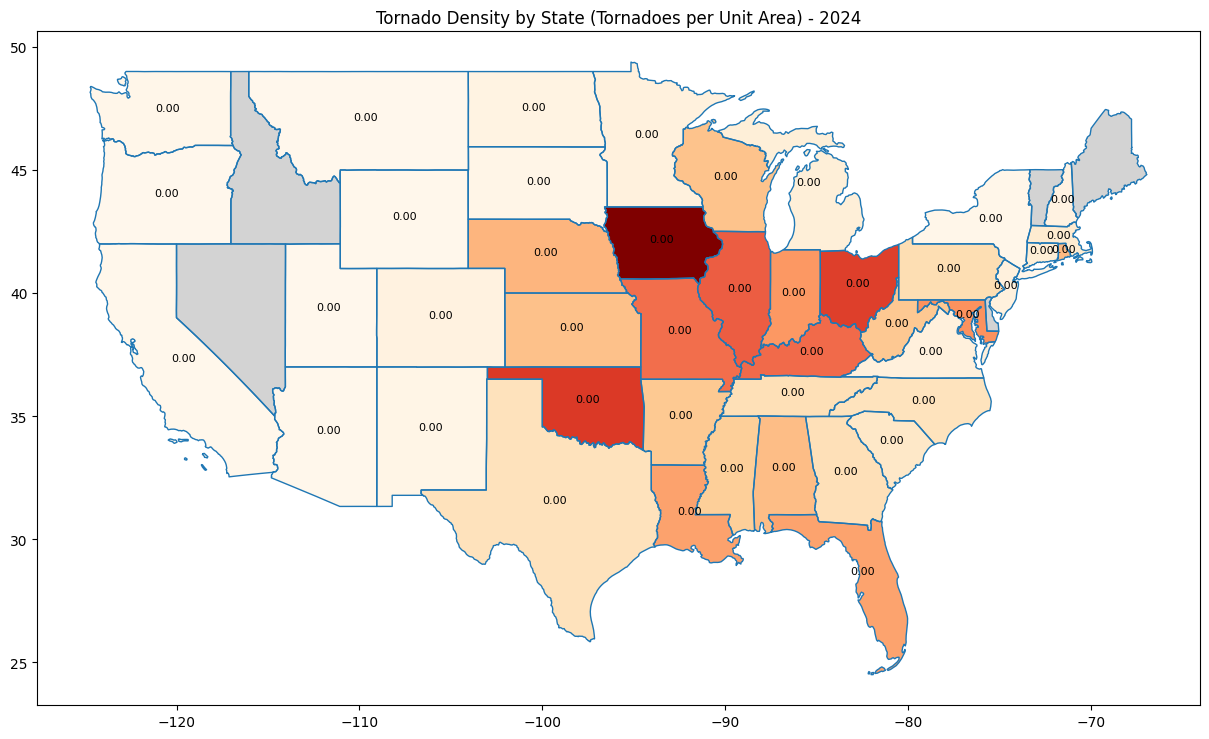

In [47]:
from matplotlib.animation import FuncAnimation

# Filter for tornado events
tornado_df = df[df['EVENT_TYPE'] == 'Tornado']

# Check if the filtered DataFrame is empty
if tornado_df.empty:
    print("No tornado events found in the DataFrame.")

# Group by year, state abbreviation, and count the number of tornadoes
tornado_counts_by_year_state = tornado_df.groupby(['YEAR', 'STATE_FIPS']).size().reset_index(name='count')

# Load the shapefile for US states
shapefile_path = 'shp/cb_2018_us_state_20m.shp'
gdf = gpd.read_file(shapefile_path)

# List of state fips codes for the 48 contiguous US states
contiguous_fips_states = [
    '01', '04', '05', '06', '08', '09', '10', '12', '13', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', 
    '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '44', '45', 
    '46', '47', '48', '49', '50', '51', '53', '54', '55', '56'
]

# Filter the GeoDataFrame to include only the contiguous states
gdf_contiguous = gdf[gdf['STATEFP'].isin(contiguous_fips_states)]

# Function to update the plot for each year
def update(year):
    ax.clear()
    ax.set_title(f'Tornado Density by State (Tornadoes per Unit Area) - {year}')
    yearly_data = tornado_counts_by_year_state[tornado_counts_by_year_state['YEAR'] == year]
    merged = gdf_contiguous.merge(yearly_data, left_on='STATEFP', right_on='STATE_FIPS', how='left')
    
    # Check for missing geometries
    merged = merged[merged.geometry.notnull()]
    
    # Validate geometries
    merged = merged[merged.is_valid]
    
    # Calculate tornado density (number of tornadoes per unit area)
    merged['tornado_density'] = merged['count'] / (merged['ALAND'] / 1e6)  # Density per square kilometer
    
    # Plot the map
    gdf_contiguous.boundary.plot(ax=ax, linewidth=1)
    merged.plot(column='tornado_density', ax=ax, legend=False, cmap='OrRd', missing_kwds={"color": "lightgrey"})
    
    # Add tornado density values as labels on the map
    for idx, row in merged.iterrows():
        if not pd.isna(row['tornado_density']):
            plt.annotate(
                text=f"{row['tornado_density']:.2f}",
                xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                ha='center',
                fontsize=8,
                color='black'
            )

# Create the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Create the animation
years = sorted(tornado_counts_by_year_state['YEAR'].unique())
ani = FuncAnimation(fig, update, frames=years, repeat=False)

# Save the animation as a GIF using Pillow writer
ani.save('tornado_density_animation.gif', writer='pillow', fps=1)  # For GIF

plt.show()

Animating the map by year doesn't really reveal any great insights.  It was fun to make; but would need some polishing for presentation.  I struggled with labels and the legend.  Ultimately it reinforces what we already knew.  Most tornados will occur in the great plains, midwest, and gulf coast.  

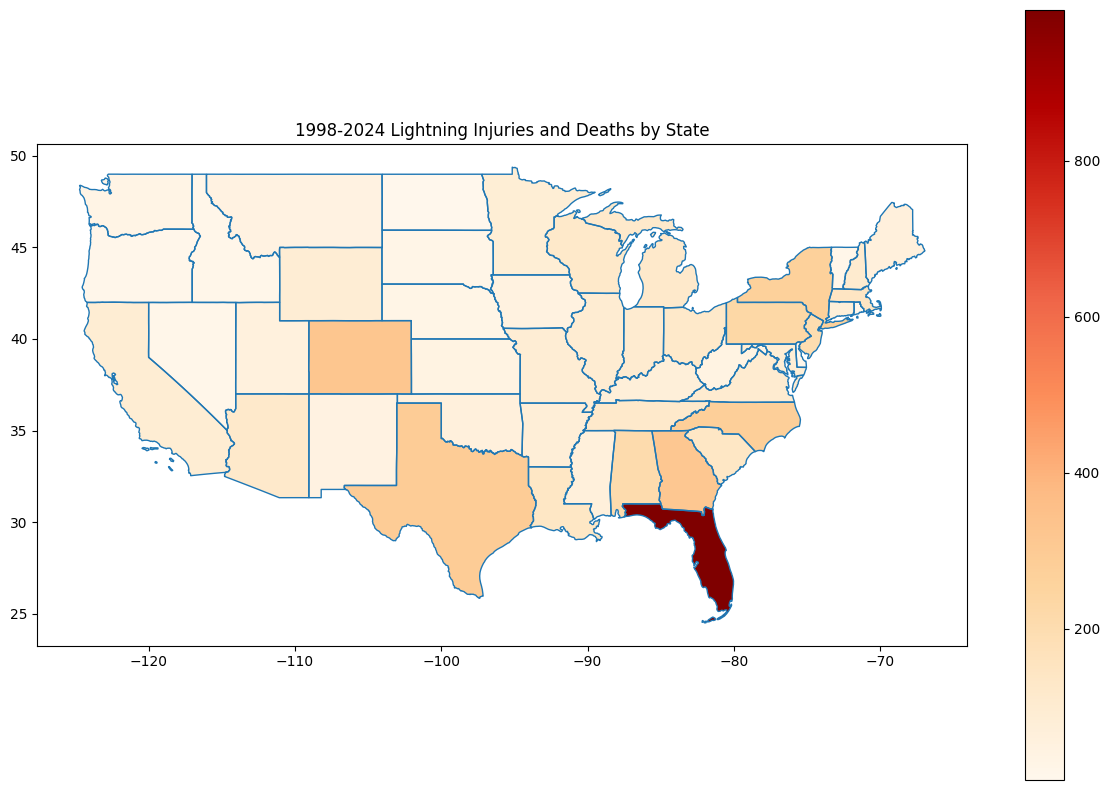

In [52]:
# Filter for lightning events
lightning_df = df[df['EVENT_TYPE'] == 'Lightning']

# Check if the filtered DataFrame is empty
if lightning_df.empty:
    print("No lightning events found in the DataFrame.")

# Group by state abbreviation and sum the injuries and deaths
lightning_injuries_deaths_by_state = lightning_df.groupby('STATE_FIPS')[['INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT']].sum().reset_index()

# Calculate total injuries and deaths
lightning_injuries_deaths_by_state['total_injuries_deaths'] = (
    lightning_injuries_deaths_by_state['INJURIES_DIRECT'] +
    lightning_injuries_deaths_by_state['INJURIES_INDIRECT'] +
    lightning_injuries_deaths_by_state['DEATHS_DIRECT'] +
    lightning_injuries_deaths_by_state['DEATHS_INDIRECT']
)

# Load the shapefile for US states
shapefile_path = 'shp/cb_2018_us_state_20m.shp'
gdf = gpd.read_file(shapefile_path)

# List of state fips codes for the 48 contiguous US states
contiguous_fips_states = [
    '01', '04', '05', '06', '08', '09', '10', '12', '13', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', 
    '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '44', '45', 
    '46', '47', '48', '49', '50', '51', '53', '54', '55', '56'
]

# Filter the GeoDataFrame to include only the contiguous states
gdf_contiguous = gdf[gdf['STATEFP'].isin(contiguous_fips_states)]

# Merge the lightning data with the state geometries
merged = gdf_contiguous.merge(lightning_injuries_deaths_by_state, left_on='STATEFP', right_on='STATE_FIPS', how='left')

# Check if the merged DataFrame contains total_injuries_deaths column and print no count column
if 'total_injuries_deaths' not in merged.columns:
    print("No lightning injuries or deaths found in the contiguous US states.")

# Check if the merged DataFrame is empty
if merged.empty:
    print("No common states found between the shapefile and lightning data.")

# Check for missing geometries
merged = merged[merged.geometry.notnull()]

# Validate geometries
merged = merged[merged.is_valid]

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf_contiguous.boundary.plot(ax=ax, linewidth=1)
merged.plot(column='total_injuries_deaths', ax=ax, legend=True, cmap='OrRd', missing_kwds={"color": "lightgrey"})

plt.title('1998-2024 Lightning Injuries and Deaths by State')
plt.show()

Wow! Florida has more deaths and injuries from lightning than any other state.  

# 4) Discussion Points


- There hasn't been an F5 tornado in over a decade.  Are we due?  I know, gambler's paradox blah blah blah.   
- There appears to be a decrease in F0 tornados and an increase in F1 tornados over the past 25 years.  Question remain as to whether this is due to measurement changes or if this is actually occuring.

# 5) Conclusions